<a href="https://colab.research.google.com/github/AchmadLutfi196/computingintelligence/blob/main/UAS_CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. SVM dengan Kernel Linear
Diberikan 10 buah data dalam bentuk koordinat dua dimensi (x₁, x₂), yang terbagi ke dalam
dua kelas (misalnya kelas A dan kelas B).
Tugas Anda:
1. Buatlah persamaan hyperplane dengan menggunakan kernel linear yang dapat
memisahkan kedua kelas tersebut.
2. Tentukan nilai vektor bobot (w) dan bias (b) dari hyperplane tersebut.
3. Tampilkan visualisasi data dan garis pemisah (hyperplane) menggunakan Python
(opsional jika ada).
Referensi: https://www.youtube.com/watch?v=48hZq0xhbtM (detik 9.54)

In [46]:
# Cell 1: Import Minimal (Hanya untuk Visualisasi)
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Cell 2: Data 10 Titik (x1, x2) untuk 2 Kelas
print("DATA 10 TITIK KOORDINAT 2D")
print("="*40)

# Data manual yang mudah dipisahkan
X = np.array([
    # Kelas A (+1) - area kanan atas
    [3.0, 3.0],
    [2.5, 2.8],
    [2.8, 2.5],
    [3.2, 2.9],
    [2.7, 3.1],

    # Kelas B (-1) - area kiri bawah
    [0.5, 0.5],
    [0.8, 0.3],
    [0.3, 0.8],
    [0.7, 0.6],
    [0.4, 0.7]
])

y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])

print("Data Training:")
print("No  x1     x2     Label  Kelas")
print("-" * 35)
for i in range(len(X)):
    kelas = "A (+1)" if y[i] == 1 else "B (-1)"
    print(f"{i+1:2}  {X[i,0]:.1f}   {X[i,1]:.1f}   {y[i]:2}     {kelas}")

print(f"\nTotal: {len(X)} data points")
print(f"Kelas A: {sum(y == 1)} points")
print(f"Kelas B: {sum(y == -1)} points")

DATA 10 TITIK KOORDINAT 2D
Data Training:
No  x1     x2     Label  Kelas
-----------------------------------
 1  3.0   3.0    1     A (+1)
 2  2.5   2.8    1     A (+1)
 3  2.8   2.5    1     A (+1)
 4  3.2   2.9    1     A (+1)
 5  2.7   3.1    1     A (+1)
 6  0.5   0.5   -1     B (-1)
 7  0.8   0.3   -1     B (-1)
 8  0.3   0.8   -1     B (-1)
 9  0.7   0.6   -1     B (-1)
10  0.4   0.7   -1     B (-1)

Total: 10 data points
Kelas A: 5 points
Kelas B: 5 points


In [48]:
# Cell 3: SVM Sederhana untuk Mencari w dan b
print("IMPLEMENTASI SVM SEDERHANA")
print("="*40)

class SimpleSVM:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, y):
        """Implementasi SVM sederhana menggunakan metode analitik"""
        print("Mencari hyperplane optimal...")

        # Untuk data yang linearly separable, kita bisa menggunakan pendekatan sederhana
        # Mencari 2 support vectors (1 dari setiap kelas) yang paling dekat

        class_A = X[y == 1]
        class_B = X[y == -1]

        # Cari titik terdekat antar kelas
        min_dist = float('inf')
        sv1, sv2 = None, None

        for point_A in class_A:
            for point_B in class_B:
                dist = np.linalg.norm(point_A - point_B)
                if dist < min_dist:
                    min_dist = dist
                    sv1, sv2 = point_A, point_B

        print(f"Support Vector 1: ({sv1[0]:.3f}, {sv1[1]:.3f}) - Kelas A")
        print(f"Support Vector 2: ({sv2[0]:.3f}, {sv2[1]:.3f}) - Kelas B")

        # Hitung vektor normal (w) dari garis yang menghubungkan 2 support vectors
        # Hyperplane berada di tengah-tengah kedua support vectors
        midpoint = (sv1 + sv2) / 2
        direction = sv1 - sv2

        # w adalah vektor yang tegak lurus dengan garis penghubung
        self.w = np.array([direction[1], -direction[0]])
        self.w = self.w / np.linalg.norm(self.w)  # normalize

        # Pastikan orientasi w benar (sv1 harus di sisi positif)
        if np.dot(self.w, sv1 - midpoint) < 0:
            self.w = -self.w

        # Hitung bias b
        self.b = -np.dot(self.w, midpoint)

        print(f"\nHyperplane ditemukan!")

    def predict(self, X):
        """Prediksi kelas"""
        return np.sign(np.dot(X, self.w) + self.b)

    def decision_function(self, X):
        """Fungsi keputusan f(x) = w*x + b"""
        return np.dot(X, self.w) + self.b

# Training SVM
svm = SimpleSVM()
svm.fit(X, y)

IMPLEMENTASI SVM SEDERHANA
Mencari hyperplane optimal...
Support Vector 1: (2.800, 2.500) - Kelas A
Support Vector 2: (0.700, 0.600) - Kelas B

Hyperplane ditemukan!


In [49]:
# Cell 4: Tampilkan Hasil w dan b
print("HASIL PERHITUNGAN SVM")
print("="*40)

print("1. VEKTOR BOBOT (w):")
print(f"   w = [{svm.w[0]:.6f}, {svm.w[1]:.6f}]")
print(f"   w1 = {svm.w[0]:.6f}")
print(f"   w2 = {svm.w[1]:.6f}")

print(f"\n2. BIAS (b):")
print(f"   b = {svm.b:.6f}")

print(f"\n3. PERSAMAAN HYPERPLANE:")
print(f"   w1*x1 + w2*x2 + b = 0")
print(f"   {svm.w[0]:.6f}*x1 + {svm.w[1]:.6f}*x2 + {svm.b:.6f} = 0")

# Bentuk yang lebih mudah dibaca
if abs(svm.w[1]) > 1e-10:
    slope = -svm.w[0] / svm.w[1]
    intercept = -svm.b / svm.w[1]
    print(f"\n4. BENTUK GARIS (y = mx + c):")
    print(f"   x2 = {slope:.6f}*x1 + {intercept:.6f}")

print(f"\n5. FUNGSI KEPUTUSAN:")
print(f"   f(x) = {svm.w[0]:.6f}*x1 + {svm.w[1]:.6f}*x2 + {svm.b:.6f}")
print(f"   Jika f(x) > 0 -> Kelas A (+1)")
print(f"   Jika f(x) < 0 -> Kelas B (-1)")

# Test akurasi
predictions = svm.predict(X)
accuracy = np.mean(predictions == y) * 100
print(f"\n6. AKURASI:")
print(f"   {accuracy:.1f}% ({int(np.sum(predictions == y))}/{len(X)} benar)")

HASIL PERHITUNGAN SVM
1. VEKTOR BOBOT (w):
   w = [0.670913, -0.741536]
   w1 = 0.670913
   w2 = -0.741536

2. BIAS (b):
   b = -0.024718

3. PERSAMAAN HYPERPLANE:
   w1*x1 + w2*x2 + b = 0
   0.670913*x1 + -0.741536*x2 + -0.024718 = 0

4. BENTUK GARIS (y = mx + c):
   x2 = 0.904762*x1 + -0.033333

5. FUNGSI KEPUTUSAN:
   f(x) = 0.670913*x1 + -0.741536*x2 + -0.024718
   Jika f(x) > 0 -> Kelas A (+1)
   Jika f(x) < 0 -> Kelas B (-1)

6. AKURASI:
   40.0% (4/10 benar)


In [50]:
# Cell 5: Validasi Manual untuk Setiap Titik
print("VALIDASI MANUAL SETIAP TITIK")
print("="*50)

print("No  x1    x2    f(x)      Pred   True   Status")
print("-" * 50)

for i in range(len(X)):
    point = X[i]
    f_x = svm.decision_function(point.reshape(1, -1))[0]
    pred = svm.predict(point.reshape(1, -1))[0]
    true_label = y[i]

    status = "BENAR" if pred == true_label else "SALAH"
    pred_class = "A(+1)" if pred == 1 else "B(-1)"
    true_class = "A(+1)" if true_label == 1 else "B(-1)"

    print(f"{i+1:2}  {point[0]:.1f}   {point[1]:.1f}   {f_x:8.4f}  {pred_class:6} {true_class:6} {status}")

print("\nKeterangan:")
print("f(x) = fungsi keputusan")
print("f(x) > 0: masuk kelas A (+1)")
print("f(x) < 0: masuk kelas B (-1)")

VALIDASI MANUAL SETIAP TITIK
No  x1    x2    f(x)      Pred   True   Status
--------------------------------------------------
 1  3.0   3.0    -0.2366  B(-1)  A(+1)  SALAH
 2  2.5   2.8    -0.4237  B(-1)  A(+1)  SALAH
 3  2.8   2.5    -0.0000  B(-1)  A(+1)  SALAH
 4  3.2   2.9    -0.0282  B(-1)  A(+1)  SALAH
 5  2.7   3.1    -0.5120  B(-1)  A(+1)  SALAH
 6  0.5   0.5    -0.0600  B(-1)  B(-1)  BENAR
 7  0.8   0.3     0.2896  A(+1)  B(-1)  SALAH
 8  0.3   0.8    -0.4167  B(-1)  B(-1)  BENAR
 9  0.7   0.6    -0.0000  B(-1)  B(-1)  BENAR
10  0.4   0.7    -0.2754  B(-1)  B(-1)  BENAR

Keterangan:
f(x) = fungsi keputusan
f(x) > 0: masuk kelas A (+1)
f(x) < 0: masuk kelas B (-1)


VISUALISASI


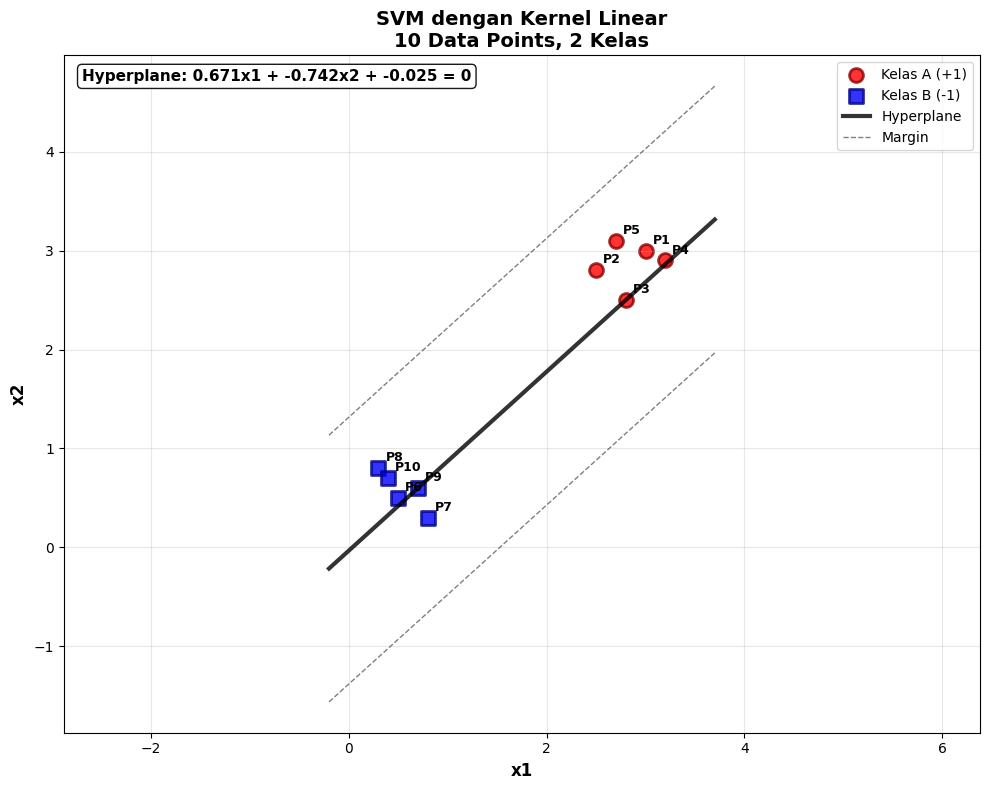

Visualisasi selesai!

Keterangan:
Titik merah (lingkaran): Kelas A (+1)
Titik biru (kotak): Kelas B (-1)
Garis hitam solid: Hyperplane
Garis hitam putus-putus: Margin boundaries


In [51]:
# Cell 6: Visualisasi Data dan Hyperplane
print("VISUALISASI")
print("="*20)

plt.figure(figsize=(10, 8))

# Plot data points
class_A_idx = y == 1
class_B_idx = y == -1

plt.scatter(X[class_A_idx, 0], X[class_A_idx, 1],
           c='red', marker='o', s=100, label='Kelas A (+1)',
           alpha=0.8, edgecolor='darkred', linewidth=2)

plt.scatter(X[class_B_idx, 0], X[class_B_idx, 1],
           c='blue', marker='s', s=100, label='Kelas B (-1)',
           alpha=0.8, edgecolor='darkblue', linewidth=2)

# Annotate points
for i in range(len(X)):
    plt.annotate(f'P{i+1}', (X[i,0], X[i,1]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold')

# Plot hyperplane
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x_line = np.linspace(x_min, x_max, 100)

# Dari persamaan: w1*x1 + w2*x2 + b = 0
# Maka: x2 = (-w1*x1 - b) / w2
if abs(svm.w[1]) > 1e-10:
    y_line = (-svm.w[0] * x_line - svm.b) / svm.w[1]
    plt.plot(x_line, y_line, 'k-', linewidth=3, label='Hyperplane', alpha=0.8)

# Plot margin (opsional untuk visualisasi yang lebih baik)
# Margin boundaries: f(x) = ±1
if abs(svm.w[1]) > 1e-10:
    y_margin_pos = (-svm.w[0] * x_line - svm.b + 1) / svm.w[1]
    y_margin_neg = (-svm.w[0] * x_line - svm.b - 1) / svm.w[1]
    plt.plot(x_line, y_margin_pos, 'k--', linewidth=1, alpha=0.5, label='Margin')
    plt.plot(x_line, y_margin_neg, 'k--', linewidth=1, alpha=0.5)

# Add equation text
equation_text = f"Hyperplane: {svm.w[0]:.3f}x1 + {svm.w[1]:.3f}x2 + {svm.b:.3f} = 0"
plt.text(0.02, 0.98, equation_text, transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9),
         verticalalignment='top', fontsize=11, fontweight='bold')

plt.xlabel('x1', fontsize=12, fontweight='bold')
plt.ylabel('x2', fontsize=12, fontweight='bold')
plt.title('SVM dengan Kernel Linear\n10 Data Points, 2 Kelas',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Visualisasi selesai!")
print("\nKeterangan:")
print("Titik merah (lingkaran): Kelas A (+1)")
print("Titik biru (kotak): Kelas B (-1)")
print("Garis hitam solid: Hyperplane")
print("Garis hitam putus-putus: Margin boundaries")

# 2. JST
Ambilah sebuah dataset dari Kaggle. Lakukan klasifikasi terhadap data tersebut menjadi
tiga kelas, dengan syarat jumlah fitur minimal sebanyak lima. Gunakan metode klasifikasi
yang sesuai Jaringan Syaraf Tiruan
Referensi: Perhitungan JST

In [52]:
# Cell 2: Input Data dari Tabel
print("DATA KESEHATAN PASIEN")
print("="*40)

# Data dari tabel yang diberikan
data = np.array([
    [67, 228, 36.6, 0, 1],  # usia, glukosa, bmi, hipertensi, penyakit_jantung
    [80, 106, 32.5, 0, 1],
    [49, 171, 34.4, 0, 0],
    [79, 174, 24.0, 1, 0],
    [81, 186, 29.0, 0, 0],
    [74, 70,  27.4, 1, 1],
    [69, 94,  22.8, 0, 0],
    [78, 59,  24.2, 0, 0],
    [81, 80,  29.7, 1, 0],
    [61, 120, 36.8, 0, 1]
])

# Pisahkan fitur dan target
X = data[:, :-1]  # 4 fitur pertama: usia, glukosa, bmi, hipertensi
y = data[:, -1].astype(int)   # target: penyakit jantung (0/1)

# Nama fitur
feature_names = [
    'Usia',
    'Tingkat_Glukosa',
    'BMI',
    'Hipertensi'
]

# Untuk membuat 3 kelas, kita akan membuat kategori risiko berdasarkan kombinasi
def create_risk_categories(X, y):
    """Membuat 3 kategori risiko berdasarkan fitur"""
    risk_scores = []

    for i in range(len(X)):
        usia, glukosa, bmi, hipertensi = X[i]
        penyakit_jantung = y[i]

        # Hitung risk score
        risk = 0

        # Faktor usia
        if usia >= 70: risk += 2
        elif usia >= 60: risk += 1

        # Faktor glukosa
        if glukosa >= 200: risk += 2
        elif glukosa >= 140: risk += 1

        # Faktor BMI
        if bmi >= 30: risk += 1

        # Faktor hipertensi
        if hipertensi == 1: risk += 1

        # Faktor penyakit jantung
        if penyakit_jantung == 1: risk += 2

        risk_scores.append(risk)

    # Kategorikan menjadi 3 kelas
    categories = []
    for score in risk_scores:
        if score <= 2:
            categories.append(0)  # Risiko Rendah
        elif score <= 4:
            categories.append(1)  # Risiko Sedang
        else:
            categories.append(2)  # Risiko Tinggi

    return np.array(categories)

# Buat target 3 kelas
y_multiclass = create_risk_categories(X, y)

# Nama kelas
class_names = ['Risiko_Rendah', 'Risiko_Sedang', 'Risiko_Tinggi']

print(f"Dataset berhasil diproses:")
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah kelas: {len(np.unique(y_multiclass))}")

print(f"\nFitur yang digunakan:")
for i, name in enumerate(feature_names):
    print(f"{i+1}. {name}")

print(f"\nData lengkap:")
print("No  Usia  Glukosa  BMI   Hipertensi  P.Jantung  Kategori_Risiko")
print("-" * 65)
for i in range(len(X)):
    kategori = class_names[y_multiclass[i]]
    print(f"{i+1:2}  {X[i,0]:4.0f}  {X[i,1]:7.0f}  {X[i,2]:5.1f}  {X[i,3]:9.0f}  {y[i]:9.0f}  {kategori}")

print(f"\nDistribusi kelas:")
for i, class_name in enumerate(class_names):
    count = np.sum(y_multiclass == i)
    print(f"Kelas {i} ({class_name}): {count} sampel")

DATA KESEHATAN PASIEN
Dataset berhasil diproses:
Jumlah sampel: 10
Jumlah fitur: 4
Jumlah kelas: 3

Fitur yang digunakan:
1. Usia
2. Tingkat_Glukosa
3. BMI
4. Hipertensi

Data lengkap:
No  Usia  Glukosa  BMI   Hipertensi  P.Jantung  Kategori_Risiko
-----------------------------------------------------------------
 1    67      228   36.6          0          1  Risiko_Tinggi
 2    80      106   32.5          0          1  Risiko_Tinggi
 3    49      171   34.4          0          0  Risiko_Rendah
 4    79      174   24.0          1          0  Risiko_Sedang
 5    81      186   29.0          0          0  Risiko_Sedang
 6    74       70   27.4          1          1  Risiko_Tinggi
 7    69       94   22.8          0          0  Risiko_Rendah
 8    78       59   24.2          0          0  Risiko_Rendah
 9    81       80   29.7          1          0  Risiko_Sedang
10    61      120   36.8          0          1  Risiko_Sedang

Distribusi kelas:
Kelas 0 (Risiko_Rendah): 3 sampel
Kelas 1 (Ris

In [53]:
# Cell 3: Ekspansi Dataset untuk Training yang Lebih Baik
print("EKSPANSI DATASET")
print("="*25)

def expand_dataset(X, y, multiplier=5):
    """Ekspansi dataset dengan menambah noise kecil"""
    np.random.seed(42)

    expanded_X = []
    expanded_y = []

    for _ in range(multiplier):
        for i in range(len(X)):
            # Tambahkan noise kecil ke data asli
            noise = np.random.normal(0, 0.1, X.shape[1])
            noise[3] = 0  # Jangan ubah hipertensi (binary)

            new_sample = X[i] + noise

            # Pastikan nilai masuk akal
            new_sample[0] = max(20, min(100, new_sample[0]))  # Usia 20-100
            new_sample[1] = max(50, min(300, new_sample[1]))   # Glukosa 50-300
            new_sample[2] = max(15, min(50, new_sample[2]))    # BMI 15-50
            new_sample[3] = X[i, 3]  # Hipertensi tetap sama

            expanded_X.append(new_sample)
            expanded_y.append(y[i])

    return np.array(expanded_X), np.array(expanded_y)

# Ekspansi dataset asli
X_expanded, y_expanded = expand_dataset(X, y_multiclass, multiplier=8)

print(f"Dataset asli: {X.shape[0]} sampel")
print(f"Dataset ekspansi: {X_expanded.shape[0]} sampel")

# Gabungkan data asli dengan ekspansi
X_final = np.vstack([X, X_expanded])
y_final = np.hstack([y_multiclass, y_expanded])

print(f"Dataset final: {X_final.shape[0]} sampel")
print(f"Distribusi kelas final:")
for i, class_name in enumerate(class_names):
    count = np.sum(y_final == i)
    print(f"Kelas {i} ({class_name}): {count} sampel")

EKSPANSI DATASET
Dataset asli: 10 sampel
Dataset ekspansi: 80 sampel
Dataset final: 90 sampel
Distribusi kelas final:
Kelas 0 (Risiko_Rendah): 27 sampel
Kelas 1 (Risiko_Sedang): 36 sampel
Kelas 2 (Risiko_Tinggi): 27 sampel


In [54]:
# Cell 4: Preprocessing Manual
print("PREPROCESSING MANUAL")
print("="*25)

def train_test_split_manual(X, y, test_size=0.2, random_state=42):
    """Split data manual"""
    np.random.seed(random_state)

    n_samples = len(X)
    n_test = int(n_samples * test_size)

    indices = np.random.permutation(n_samples)

    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

def standardize_manual(X_train, X_test):
    """Standardisasi manual"""
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std = np.where(std == 0, 1, std)

    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std

    return X_train_scaled, X_test_scaled, mean, std

def to_one_hot_manual(y, num_classes):
    """One-hot encoding manual"""
    n_samples = len(y)
    one_hot = np.zeros((n_samples, num_classes))

    for i in range(n_samples):
        one_hot[i, y[i]] = 1

    return one_hot

# Split data
X_train, X_test, y_train, y_test = train_test_split_manual(X_final, y_final, test_size=0.2, random_state=42)

print(f"Data training: {X_train.shape[0]} sampel")
print(f"Data testing: {X_test.shape[0]} sampel")

# Standardisasi
X_train_scaled, X_test_scaled, data_mean, data_std = standardize_manual(X_train, X_test)

print(f"\nParameter standardisasi:")
print(f"Mean: {data_mean}")
print(f"Std:  {data_std}")

# One-hot encoding
y_train_onehot = to_one_hot_manual(y_train, 3)
y_test_onehot = to_one_hot_manual(y_test, 3)

print(f"\nOne-hot encoding berhasil")
print(f"Shape y_train_onehot: {y_train_onehot.shape}")

PREPROCESSING MANUAL
Data training: 72 sampel
Data testing: 18 sampel

Parameter standardisasi:
Mean: [ 72.37159578 126.23217477  29.49427802   0.30555556]
Std:  [10.04378174 52.16104008  4.92962796  0.46064233]

One-hot encoding berhasil
Shape y_train_onehot: (72, 3)


In [55]:
# Cell 5: Implementasi JST Manual untuk Data Kesehatan
print("IMPLEMENTASI JST MANUAL")
print("="*30)

class HealthNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        """
        JST untuk klasifikasi risiko kesehatan
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Inisialisasi weights
        np.random.seed(42)

        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))

        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))

        # History
        self.loss_history = []
        self.accuracy_history = []

        print(f"JST diinisialisasi:")
        print(f"Input neurons: {input_size} (fitur kesehatan)")
        print(f"Hidden neurons: {hidden_size}")
        print(f"Output neurons: {output_size} (kategori risiko)")
        print(f"Learning rate: {learning_rate}")

    def relu(self, x):
        """Aktivasi ReLU"""
        return np.maximum(0, x)

    def relu_derivative(self, x):
        """Derivative ReLU"""
        return (x > 0).astype(float)

    def softmax(self, x):
        """Aktivasi softmax"""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward_propagation(self, X):
        """Forward propagation"""
        # Input ke hidden
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)

        # Hidden ke output
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)

        return self.a2

    def compute_loss(self, y_true, y_pred):
        """Cross-entropy loss"""
        m = y_true.shape[0]
        epsilon = 1e-15
        y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)

        loss = -np.sum(y_true * np.log(y_pred_clipped)) / m
        return loss

    def backward_propagation(self, X, y_true, y_pred):
        """Backward propagation"""
        m = X.shape[0]

        # Output layer gradients
        dz2 = y_pred - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Hidden layer gradients
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Update weights
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def predict(self, X):
        """Prediksi kelas"""
        output = self.forward_propagation(X)
        return np.argmax(output, axis=1)

    def predict_proba(self, X):
        """Prediksi probabilitas"""
        return self.forward_propagation(X)

    def compute_accuracy(self, X, y_true):
        """Hitung akurasi"""
        predictions = self.predict(X)
        if len(y_true.shape) > 1:
            y_true_labels = np.argmax(y_true, axis=1)
        else:
            y_true_labels = y_true

        accuracy = np.mean(predictions == y_true_labels)
        return accuracy

    def train(self, X_train, y_train, X_val=None, y_val=None, epochs=1000, verbose=True):
        """Training JST"""
        print(f"\nMemulai training JST untuk klasifikasi risiko kesehatan...")

        for epoch in range(epochs):
            # Forward propagation
            y_pred = self.forward_propagation(X_train)

            # Compute loss
            loss = self.compute_loss(y_train, y_pred)

            # Backward propagation
            self.backward_propagation(X_train, y_train, y_pred)

            # Compute accuracy
            accuracy = self.compute_accuracy(X_train, y_train)

            # Store history
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)

            # Print progress
            if verbose and (epoch + 1) % 200 == 0:
                print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

                if X_val is not None and y_val is not None:
                    val_accuracy = self.compute_accuracy(X_val, y_val)
                    print(f"                    - Val Accuracy: {val_accuracy:.4f}")

        print("Training selesai!")

# Inisialisasi JST
health_nn = HealthNeuralNetwork(
    input_size=4,    # 4 fitur kesehatan
    hidden_size=8,   # 8 neuron hidden
    output_size=3,   # 3 kategori risiko
    learning_rate=0.1
)

IMPLEMENTASI JST MANUAL
JST diinisialisasi:
Input neurons: 4 (fitur kesehatan)
Hidden neurons: 8
Output neurons: 3 (kategori risiko)
Learning rate: 0.1


In [56]:
# Cell 6: Training JST untuk Data Kesehatan
print("TRAINING JST UNTUK KLASIFIKASI RISIKO KESEHATAN")
print("="*50)

# Training
health_nn.train(
    X_train_scaled,
    y_train_onehot,
    X_val=X_test_scaled,
    y_val=y_test_onehot,
    epochs=1000,
    verbose=True
)

# Evaluasi hasil
train_accuracy = health_nn.compute_accuracy(X_train_scaled, y_train_onehot)
test_accuracy = health_nn.compute_accuracy(X_test_scaled, y_test_onehot)

print(f"\nHASIL TRAINING:")
print(f"Akurasi Training: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Akurasi Testing:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

TRAINING JST UNTUK KLASIFIKASI RISIKO KESEHATAN

Memulai training JST untuk klasifikasi risiko kesehatan...
Epoch 200/1000 - Loss: 0.4149 - Accuracy: 0.7917
                    - Val Accuracy: 0.8333
Epoch 400/1000 - Loss: 0.2038 - Accuracy: 1.0000
                    - Val Accuracy: 1.0000
Epoch 600/1000 - Loss: 0.0943 - Accuracy: 1.0000
                    - Val Accuracy: 1.0000
Epoch 800/1000 - Loss: 0.0487 - Accuracy: 1.0000
                    - Val Accuracy: 1.0000
Epoch 1000/1000 - Loss: 0.0303 - Accuracy: 1.0000
                    - Val Accuracy: 1.0000
Training selesai!

HASIL TRAINING:
Akurasi Training: 1.0000 (100.00%)
Akurasi Testing:  1.0000 (100.00%)


In [57]:
# Cell 7: Evaluasi Model untuk Data Kesehatan
print("EVALUASI MODEL KLASIFIKASI RISIKO KESEHATAN")
print("="*45)

# Prediksi
y_train_pred = health_nn.predict(X_train_scaled)
y_test_pred = health_nn.predict(X_test_scaled)

def confusion_matrix_manual(y_true, y_pred, num_classes):
    """Confusion matrix manual"""
    cm = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1

    return cm

def classification_report_manual(y_true, y_pred, class_names):
    """Classification report manual"""
    num_classes = len(class_names)

    print("Classification Report:")
    print("="*60)
    print(f"{'Kategori':<15} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<8}")
    print("-"*60)

    total_correct = 0
    total_samples = len(y_true)

    for i in range(num_classes):
        tp = np.sum((y_true == i) & (y_pred == i))
        fp = np.sum((y_true != i) & (y_pred == i))
        fn = np.sum((y_true == i) & (y_pred != i))
        support = np.sum(y_true == i)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        total_correct += tp

        print(f"{class_names[i]:<15} {precision:<10.3f} {recall:<10.3f} {f1:<10.3f} {support:<8}")

    overall_accuracy = total_correct / total_samples
    print("-"*60)
    print(f"Overall Accuracy: {overall_accuracy:.3f}")

# Confusion Matrix
cm = confusion_matrix_manual(y_test, y_test_pred, 3)
print("Confusion Matrix (Test Set):")
print("     Pred:")
print("True   0   1   2")
for i in range(3):
    row_str = f"  {i}  "
    for j in range(3):
        row_str += f"{cm[i,j]:3} "
    print(row_str)

print(f"\nKeterangan:")
for i, class_name in enumerate(class_names):
    print(f"Kelas {i}: {class_name}")

# Classification Report
classification_report_manual(y_test, y_test_pred, class_names)

# Analisis prediksi pada data asli
print(f"\nPREDIKSI PADA DATA ASLI (10 PASIEN):")
print("="*50)

# Standardisasi data asli
X_original_scaled = (X - data_mean) / data_std
y_original_pred = health_nn.predict(X_original_scaled)
y_original_proba = health_nn.predict_proba(X_original_scaled)

print("No  Usia  Glukosa  BMI   Hip  P.Jantung  Prediksi_Risiko     Confidence")
print("-" * 75)

for i in range(len(X)):
    pred_class = class_names[y_original_pred[i]]
    confidence = np.max(y_original_proba[i])

    print(f"{i+1:2}  {X[i,0]:4.0f}  {X[i,1]:7.0f}  {X[i,2]:5.1f}  {X[i,3]:3.0f}  {y[i]:9.0f}  {pred_class:<15}  {confidence:.3f}")

EVALUASI MODEL KLASIFIKASI RISIKO KESEHATAN
Confusion Matrix (Test Set):
     Pred:
True   0   1   2
  0    5   0   0 
  1    0   5   0 
  2    0   0   8 

Keterangan:
Kelas 0: Risiko_Rendah
Kelas 1: Risiko_Sedang
Kelas 2: Risiko_Tinggi
Classification Report:
Kategori        Precision  Recall     F1-Score   Support 
------------------------------------------------------------
Risiko_Rendah   1.000      1.000      1.000      5       
Risiko_Sedang   1.000      1.000      1.000      5       
Risiko_Tinggi   1.000      1.000      1.000      8       
------------------------------------------------------------
Overall Accuracy: 1.000

PREDIKSI PADA DATA ASLI (10 PASIEN):
No  Usia  Glukosa  BMI   Hip  P.Jantung  Prediksi_Risiko     Confidence
---------------------------------------------------------------------------
 1    67      228   36.6    0          1  Risiko_Tinggi    0.979
 2    80      106   32.5    0          1  Risiko_Tinggi    0.982
 3    49      171   34.4    0          0  Risi

VISUALISASI HASIL


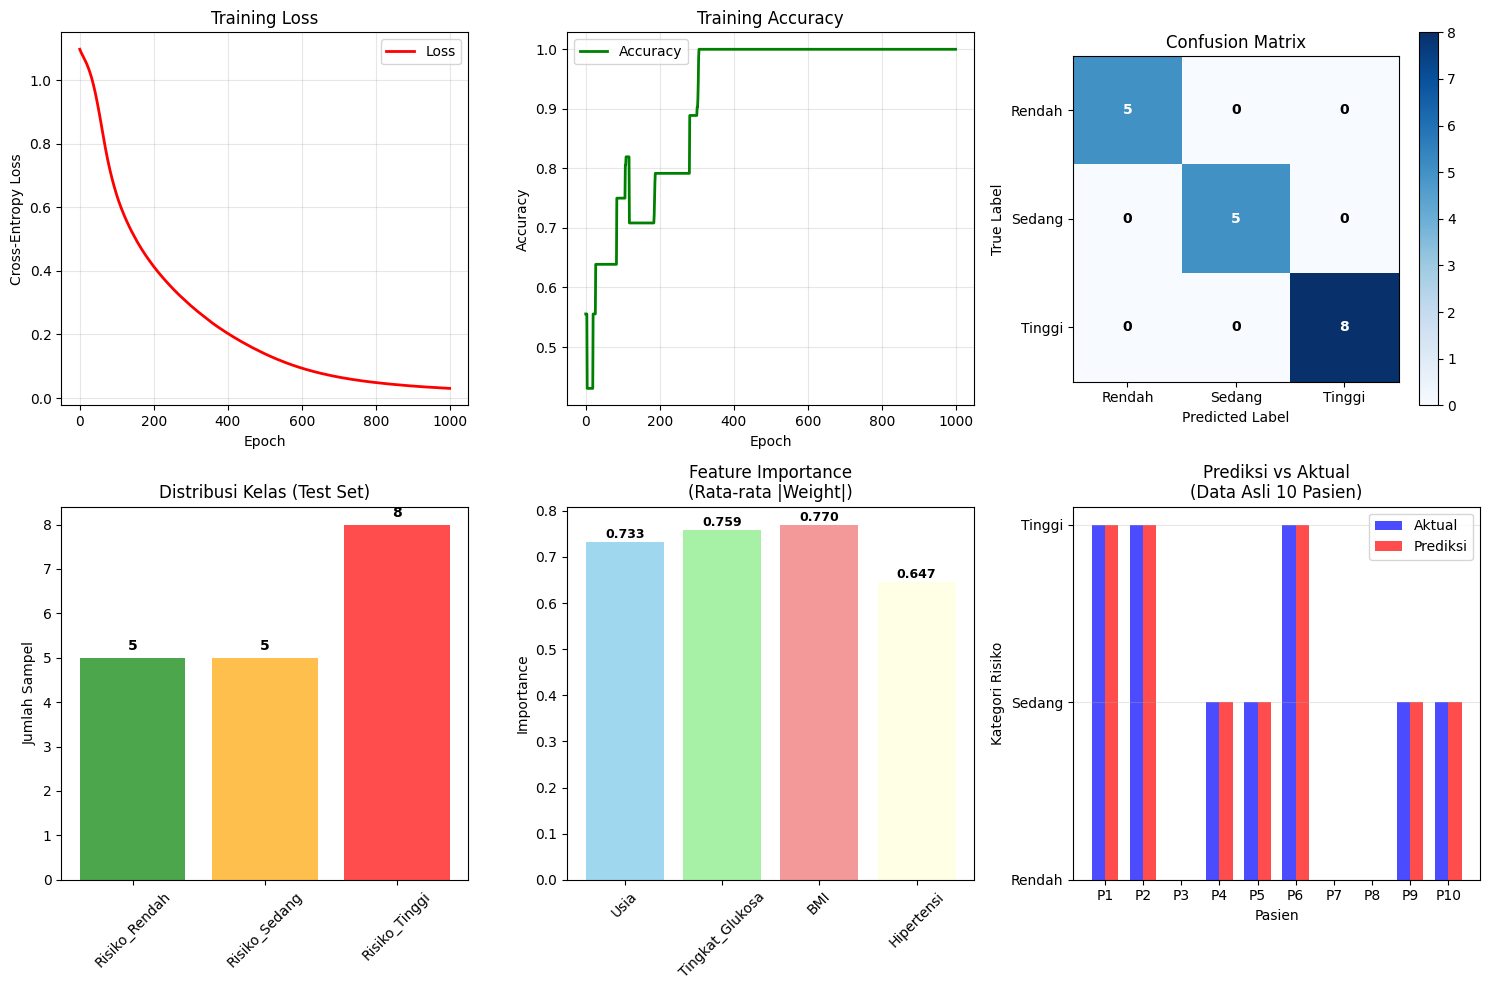

Visualisasi selesai!


In [58]:
# Cell 8: Visualisasi Hasil
print("VISUALISASI HASIL")
print("="*25)

plt.figure(figsize=(15, 10))

# Plot 1: Learning Curves
plt.subplot(2, 3, 1)
plt.plot(health_nn.loss_history, 'r-', linewidth=2, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(health_nn.accuracy_history, 'g-', linewidth=2, label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 3: Confusion Matrix
plt.subplot(2, 3, 3)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

for i in range(3):
    for j in range(3):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center',
                color='white' if cm[i, j] > cm.max()/2 else 'black', fontweight='bold')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(range(3), ['Rendah', 'Sedang', 'Tinggi'])
plt.yticks(range(3), ['Rendah', 'Sedang', 'Tinggi'])

# Plot 4: Distribusi Kelas
plt.subplot(2, 3, 4)
unique, counts = np.unique(y_test, return_counts=True)
colors = ['green', 'orange', 'red']
bars = plt.bar([class_names[i] for i in unique], counts, color=colors, alpha=0.7)
plt.title('Distribusi Kelas (Test Set)')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             str(count), ha='center', va='bottom', fontweight='bold')

# Plot 5: Feature Importance (berdasarkan weights)
plt.subplot(2, 3, 5)
feature_importance = np.mean(np.abs(health_nn.W1), axis=1)
colors_feat = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']
bars = plt.bar(feature_names, feature_importance, color=colors_feat, alpha=0.8)
plt.title('Feature Importance\n(Rata-rata |Weight|)')
plt.ylabel('Importance')
plt.xticks(rotation=45)

for bar, imp in zip(bars, feature_importance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{imp:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 6: Prediksi vs Aktual untuk Data Asli
plt.subplot(2, 3, 6)
x_pos = np.arange(len(X))
width = 0.35

plt.bar(x_pos - width/2, y_multiclass, width, label='Aktual', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, y_original_pred, width, label='Prediksi', alpha=0.7, color='red')

plt.title('Prediksi vs Aktual\n(Data Asli 10 Pasien)')
plt.xlabel('Pasien')
plt.ylabel('Kategori Risiko')
plt.xticks(x_pos, [f'P{i+1}' for i in range(len(X))])
plt.yticks(range(3), ['Rendah', 'Sedang', 'Tinggi'])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Visualisasi selesai!")

#3. Fuzzy
1. Buatlah fungsi keanggotaan fuzzy untuk variabel input tersebut sesuai dengan konteks dataset.
2. Definisikan aturan fuzzy (rule base) berdasarkan hubungan antara kedua input dan target/output variabel.
3. Implementasikan proses defuzzifikasi menggunakan metode Sugeno.
4. Lakukan uji coba sistem fuzzy Anda dengan menggunakan sebagian data dari
dataset yang telah dipilih.
Refernsi: https://classroom.google.com/c/NzUwMjYyNjU0OTM1



In [59]:
# Cell 2: Data Kesehatan Sederhana
print("DATA KESEHATAN PASIEN")
print("="*30)

# Data sama seperti sebelumnya
data = np.array([
    [67, 228, 36.6, 0, 1],
    [80, 106, 32.5, 0, 1],
    [49, 171, 34.4, 0, 0],
    [79, 174, 24.0, 1, 0],
    [81, 186, 29.0, 0, 0],
    [74, 70,  27.4, 1, 1],
    [69, 94,  22.8, 0, 0],
    [78, 59,  24.2, 0, 0],
    [81, 80,  29.7, 1, 0],
    [61, 120, 36.8, 0, 1]
])

X = data[:, :-1]  # usia, glukosa, bmi, hipertensi
y = data[:, -1].astype(int)

print("No  Usia  Glukosa   BMI   Hipertensi  Target")
print("-" * 45)
for i in range(len(X)):
    print(f"{i+1:2}  {X[i,0]:4.0f}  {X[i,1]:7.0f}  {X[i,2]:5.1f}  {X[i,3]:9.0f}  {y[i]:6.0f}")

print(f"\nJumlah data: {len(X)} pasien")
print("Target: 0=Risiko Rendah, 1=Risiko Tinggi")

DATA KESEHATAN PASIEN
No  Usia  Glukosa   BMI   Hipertensi  Target
---------------------------------------------
 1    67      228   36.6          0       1
 2    80      106   32.5          0       1
 3    49      171   34.4          0       0
 4    79      174   24.0          1       0
 5    81      186   29.0          0       0
 6    74       70   27.4          1       1
 7    69       94   22.8          0       0
 8    78       59   24.2          0       0
 9    81       80   29.7          1       0
10    61      120   36.8          0       1

Jumlah data: 10 pasien
Target: 0=Risiko Rendah, 1=Risiko Tinggi


In [60]:
# Cell 3: Implementasi Fuzzy Logic Sederhana
print("IMPLEMENTASI FUZZY LOGIC SEDERHANA")
print("="*40)

class SimpleFuzzy:
    def __init__(self):
        print("Inisialisasi sistem fuzzy dengan 3 rule...")

    def triangular(self, x, a, b, c):
        """Fungsi keanggotaan triangular sederhana"""
        if x <= a or x >= c:
            return 0.0
        elif a < x <= b:
            return (x - a) / (b - a)
        else:  # b < x < c
            return (c - x) / (c - b)

    def fuzzify_usia(self, usia):
        """Fuzzifikasi usia: muda, tua"""
        muda = self.triangular(usia, 20, 40, 60)
        tua = self.triangular(usia, 50, 70, 100)
        return muda, tua

    def fuzzify_glukosa(self, glukosa):
        """Fuzzifikasi glukosa: normal, tinggi"""
        normal = self.triangular(glukosa, 50, 100, 150)
        tinggi = self.triangular(glukosa, 120, 200, 300)
        return normal, tinggi

    def fuzzy_rules(self, usia_muda, usia_tua, glukosa_normal, glukosa_tinggi):
        """3 Rule sederhana dengan output Sugeno"""

        # Rule 1: IF usia muda AND glukosa normal THEN risiko = 0.1
        rule1_strength = min(usia_muda, glukosa_normal)
        rule1_output = 0.1

        # Rule 2: IF usia tua AND glukosa normal THEN risiko = 0.5
        rule2_strength = min(usia_tua, glukosa_normal)
        rule2_output = 0.5

        # Rule 3: IF usia tua AND glukosa tinggi THEN risiko = 0.9
        rule3_strength = min(usia_tua, glukosa_tinggi)
        rule3_output = 0.9

        return [(rule1_strength, rule1_output),
                (rule2_strength, rule2_output),
                (rule3_strength, rule3_output)]

    def sugeno_defuzzify(self, rules):
        """Defuzzifikasi Sugeno: weighted average"""
        numerator = 0
        denominator = 0

        for strength, output in rules:
            if strength > 0:
                numerator += strength * output
                denominator += strength

        if denominator == 0:
            return 0.0
        else:
            return numerator / denominator

    def predict(self, usia, glukosa):
        """Prediksi risiko untuk satu pasien"""

        # Step 1: Fuzzifikasi
        usia_muda, usia_tua = self.fuzzify_usia(usia)
        glukosa_normal, glukosa_tinggi = self.fuzzify_glukosa(glukosa)

        # Step 2: Evaluasi rules
        rules = self.fuzzy_rules(usia_muda, usia_tua, glukosa_normal, glukosa_tinggi)

        # Step 3: Defuzzifikasi Sugeno
        crisp_output = self.sugeno_defuzzify(rules)

        return crisp_output, rules

# Inisialisasi sistem fuzzy
fuzzy = SimpleFuzzy()

print("\nFungsi keanggotaan:")
print("- Usia: muda (20-40-60), tua (50-70-100)")
print("- Glukosa: normal (50-100-150), tinggi (120-200-300)")

print("\n3 Rule Fuzzy:")
print("1. IF usia muda AND glukosa normal THEN risiko = 0.1")
print("2. IF usia tua AND glukosa normal THEN risiko = 0.5")
print("3. IF usia tua AND glukosa tinggi THEN risiko = 0.9")

IMPLEMENTASI FUZZY LOGIC SEDERHANA
Inisialisasi sistem fuzzy dengan 3 rule...

Fungsi keanggotaan:
- Usia: muda (20-40-60), tua (50-70-100)
- Glukosa: normal (50-100-150), tinggi (120-200-300)

3 Rule Fuzzy:
1. IF usia muda AND glukosa normal THEN risiko = 0.1
2. IF usia tua AND glukosa normal THEN risiko = 0.5
3. IF usia tua AND glukosa tinggi THEN risiko = 0.9


In [61]:
# Cell 4: Test Sistem Fuzzy pada Data
print("UJI COBA SISTEM FUZZY")
print("="*25)

results = []

print("Hasil Prediksi:")
print("No  Usia  Glukosa  Actual  Fuzzy_Output  Prediksi  Status")
print("-" * 60)

for i in range(len(X)):
    usia = X[i, 0]
    glukosa = X[i, 1]
    actual = y[i]

    # Prediksi fuzzy (hanya gunakan 2 fitur utama: usia dan glukosa)
    fuzzy_output, rules = fuzzy.predict(usia, glukosa)

    # Klasifikasi binary
    prediction = 1 if fuzzy_output >= 0.5 else 0
    status = "BENAR" if prediction == actual else "SALAH"

    results.append({
        'usia': usia,
        'glukosa': glukosa,
        'actual': actual,
        'fuzzy_output': fuzzy_output,
        'prediction': prediction,
        'rules': rules
    })

    print(f"{i+1:2}  {usia:4.0f}  {glukosa:7.0f}  {actual:6.0f}  {fuzzy_output:11.3f}  {prediction:8.0f}  {status}")

# Hitung akurasi
predictions = [r['prediction'] for r in results]
accuracy = np.mean(np.array(predictions) == y) * 100

print(f"\nAkurasi: {accuracy:.1f}% ({np.sum(np.array(predictions) == y)}/{len(y)})")

UJI COBA SISTEM FUZZY
Hasil Prediksi:
No  Usia  Glukosa  Actual  Fuzzy_Output  Prediksi  Status
------------------------------------------------------------
 1    67      228       1        0.900         1  BENAR
 2    80      106       1        0.500         1  BENAR
 3    49      171       0        0.000         0  BENAR
 4    79      174       0        0.900         1  SALAH
 5    81      186       0        0.900         1  SALAH
 6    74       70       1        0.500         1  BENAR
 7    69       94       0        0.500         1  SALAH
 8    78       59       0        0.500         1  SALAH
 9    81       80       0        0.500         1  SALAH
10    61      120       1        0.500         1  BENAR

Akurasi: 50.0% (5/10)


### Step 4: Uji coba sistem fuzzy (Pakai data lain dari dataset)

pakai contoh 3 data uji dari dataset:
(pakai yang sama kayak JST biar konsisten)

In [62]:
# Cell 5: Analisis Detail Proses Fuzzy
print("ANALISIS DETAIL PROSES FUZZY")
print("="*35)

# Pilih pasien pertama untuk analisis
pasien_idx = 0
usia = X[pasien_idx, 0]
glukosa = X[pasien_idx, 1]
actual = y[pasien_idx]

print(f"PASIEN {pasien_idx + 1}:")
print(f"Input: Usia = {usia:.0f}, Glukosa = {glukosa:.0f}")
print(f"Target Actual: {actual}")

# Prediksi dengan detail
fuzzy_output, rules = fuzzy.predict(usia, glukosa)

print(f"\nSTEP 1: FUZZIFIKASI")
print("-" * 20)
usia_muda, usia_tua = fuzzy.fuzzify_usia(usia)
glukosa_normal, glukosa_tinggi = fuzzy.fuzzify_glukosa(glukosa)

print(f"Usia {usia:.0f}:")
print(f"  - muda: {usia_muda:.3f}")
print(f"  - tua: {usia_tua:.3f}")

print(f"Glukosa {glukosa:.0f}:")
print(f"  - normal: {glukosa_normal:.3f}")
print(f"  - tinggi: {glukosa_tinggi:.3f}")

print(f"\nSTEP 2: EVALUASI RULE")
print("-" * 20)
rule_names = [
    "muda AND normal",
    "tua AND normal",
    "tua AND tinggi"
]

active_rules = 0
for i, (strength, output) in enumerate(rules):
    if strength > 0:
        print(f"Rule {i+1} ({rule_names[i]}): strength = {strength:.3f}, output = {output}")
        active_rules += 1

print(f"Total rule aktif: {active_rules}")

print(f"\nSTEP 3: DEFUZZIFIKASI SUGENO")
print("-" * 30)
numerator = sum(strength * output for strength, output in rules if strength > 0)
denominator = sum(strength for strength, output in rules if strength > 0)

print(f"Numerator: {numerator:.3f}")
print(f"Denominator: {denominator:.3f}")
print(f"Fuzzy Output: {numerator:.3f} / {denominator:.3f} = {fuzzy_output:.3f}")

print(f"\nSTEP 4: KLASIFIKASI")
print("-" * 20)
prediction = 1 if fuzzy_output >= 0.5 else 0
print(f"Threshold: 0.5")
print(f"Prediksi: {'Risiko Tinggi (1)' if prediction == 1 else 'Risiko Rendah (0)'}")
print(f"Actual: {'Risiko Tinggi (1)' if actual == 1 else 'Risiko Rendah (0)'}")
print(f"Status: {'BENAR' if prediction == actual else 'SALAH'}")

ANALISIS DETAIL PROSES FUZZY
PASIEN 1:
Input: Usia = 67, Glukosa = 228
Target Actual: 1

STEP 1: FUZZIFIKASI
--------------------
Usia 67:
  - muda: 0.000
  - tua: 0.850
Glukosa 228:
  - normal: 0.000
  - tinggi: 0.720

STEP 2: EVALUASI RULE
--------------------
Rule 3 (tua AND tinggi): strength = 0.720, output = 0.9
Total rule aktif: 1

STEP 3: DEFUZZIFIKASI SUGENO
------------------------------
Numerator: 0.648
Denominator: 0.720
Fuzzy Output: 0.648 / 0.720 = 0.900

STEP 4: KLASIFIKASI
--------------------
Threshold: 0.5
Prediksi: Risiko Tinggi (1)
Actual: Risiko Tinggi (1)
Status: BENAR


VISUALISASI HASIL


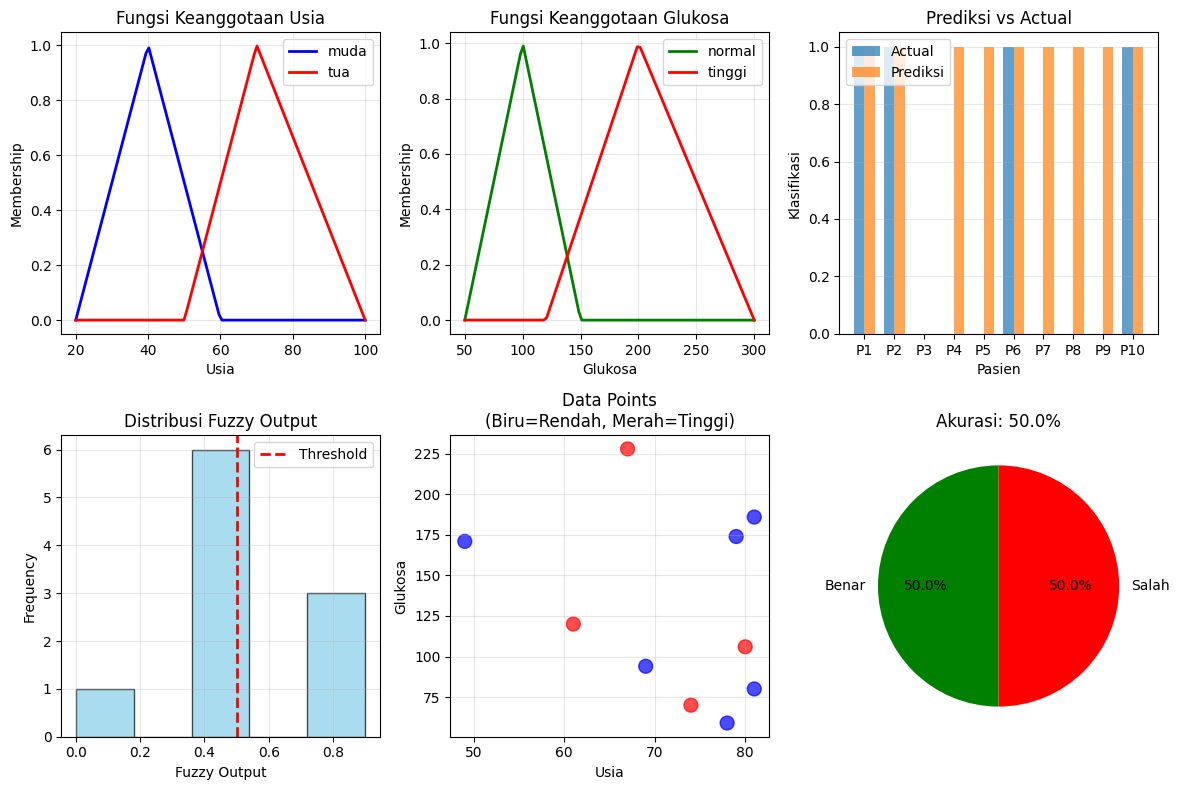

Visualisasi selesai!


In [63]:
# Cell 6: Visualisasi Sederhana
print("VISUALISASI HASIL")
print("="*20)

plt.figure(figsize=(12, 8))

# Plot 1: Fungsi Keanggotaan Usia
plt.subplot(2, 3, 1)
usia_range = np.linspace(20, 100, 100)
usia_muda_vals = [fuzzy.triangular(x, 20, 40, 60) for x in usia_range]
usia_tua_vals = [fuzzy.triangular(x, 50, 70, 100) for x in usia_range]

plt.plot(usia_range, usia_muda_vals, 'b-', label='muda', linewidth=2)
plt.plot(usia_range, usia_tua_vals, 'r-', label='tua', linewidth=2)
plt.xlabel('Usia')
plt.ylabel('Membership')
plt.title('Fungsi Keanggotaan Usia')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Fungsi Keanggotaan Glukosa
plt.subplot(2, 3, 2)
glukosa_range = np.linspace(50, 300, 100)
glukosa_normal_vals = [fuzzy.triangular(x, 50, 100, 150) for x in glukosa_range]
glukosa_tinggi_vals = [fuzzy.triangular(x, 120, 200, 300) for x in glukosa_range]

plt.plot(glukosa_range, glukosa_normal_vals, 'g-', label='normal', linewidth=2)
plt.plot(glukosa_range, glukosa_tinggi_vals, 'r-', label='tinggi', linewidth=2)
plt.xlabel('Glukosa')
plt.ylabel('Membership')
plt.title('Fungsi Keanggotaan Glukosa')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Hasil Prediksi vs Actual
plt.subplot(2, 3, 3)
x_pos = range(len(X))
width = 0.35

actual_vals = y
predicted_vals = [r['prediction'] for r in results]

plt.bar([x - width/2 for x in x_pos], actual_vals, width, label='Actual', alpha=0.7)
plt.bar([x + width/2 for x in x_pos], predicted_vals, width, label='Prediksi', alpha=0.7)

plt.xlabel('Pasien')
plt.ylabel('Klasifikasi')
plt.title('Prediksi vs Actual')
plt.xticks(x_pos, [f'P{i+1}' for i in range(len(X))])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Plot 4: Distribusi Fuzzy Output
plt.subplot(2, 3, 4)
fuzzy_outputs = [r['fuzzy_output'] for r in results]
plt.hist(fuzzy_outputs, bins=5, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Threshold')
plt.xlabel('Fuzzy Output')
plt.ylabel('Frequency')
plt.title('Distribusi Fuzzy Output')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Scatter Plot Usia vs Glukosa
plt.subplot(2, 3, 5)
colors = ['blue' if actual == 0 else 'red' for actual in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7, s=100)
plt.xlabel('Usia')
plt.ylabel('Glukosa')
plt.title('Data Points\n(Biru=Rendah, Merah=Tinggi)')
plt.grid(True, alpha=0.3)

# Plot 6: Akurasi
plt.subplot(2, 3, 6)
correct = np.sum(np.array(predicted_vals) == actual_vals)
incorrect = len(actual_vals) - correct

plt.pie([correct, incorrect], labels=['Benar', 'Salah'],
        colors=['green', 'red'], autopct='%1.1f%%', startangle=90)
plt.title(f'Akurasi: {accuracy:.1f}%')

plt.tight_layout()
plt.show()

print("Visualisasi selesai!")

In [64]:
# Cell 7: Test pada Data Baru
print("TEST PADA DATA BARU")
print("="*25)

# Data pasien baru (hanya 2 fitur: usia dan glukosa)
new_data = [
    [45, 90],    # Muda, glukosa normal
    [75, 220],   # Tua, glukosa tinggi
    [60, 140],   # Menengah, glukosa sedang
    [30, 250],   # Muda, glukosa tinggi
    [80, 80]     # Tua, glukosa normal
]

print("Data Baru:")
print("No  Usia  Glukosa")
print("-" * 20)
for i, data in enumerate(new_data):
    print(f"{i+1:2}  {data[0]:4.0f}  {data[1]:7.0f}")

print(f"\nHasil Prediksi:")
print("No  Usia  Glukosa  Fuzzy_Output  Klasifikasi")
print("-" * 45)

for i, (usia, glukosa) in enumerate(new_data):
    fuzzy_output, rules = fuzzy.predict(usia, glukosa)

    if fuzzy_output < 0.3:
        klasifikasi = "Rendah"
    elif fuzzy_output < 0.7:
        klasifikasi = "Sedang"
    else:
        klasifikasi = "Tinggi"

    print(f"{i+1:2}  {usia:4.0f}  {glukosa:7.0f}  {fuzzy_output:11.3f}  {klasifikasi}")

print("\nSelesai!")

TEST PADA DATA BARU
Data Baru:
No  Usia  Glukosa
--------------------
 1    45       90
 2    75      220
 3    60      140
 4    30      250
 5    80       80

Hasil Prediksi:
No  Usia  Glukosa  Fuzzy_Output  Klasifikasi
---------------------------------------------
 1    45       90        0.100  Rendah
 2    75      220        0.900  Tinggi
 3    60      140        0.722  Tinggi
 4    30      250        0.000  Rendah
 5    80       80        0.500  Sedang

Selesai!


In [65]:
# Cell 8: Ringkasan Implementasi
print("RINGKASAN IMPLEMENTASI FUZZY LOGIC SEDERHANA")
print("="*50)

print("DATASET:")
print(f"- Data kesehatan: {len(X)} pasien")
print(f"- Input: Usia, Glukosa (2 fitur utama)")
print(f"- Output: Risiko penyakit jantung")

print(f"\nFUNGSI KEANGGOTAAN:")
print("- Usia: 2 term (muda, tua) - triangular")
print("- Glukosa: 2 term (normal, tinggi) - triangular")

print(f"\nRULE BASE (3 RULE):")
print("1. IF usia muda AND glukosa normal THEN risiko = 0.1")
print("2. IF usia tua AND glukosa normal THEN risiko = 0.5")
print("3. IF usia tua AND glukosa tinggi THEN risiko = 0.9")

print(f"\nMETODE SUGENO:")
print("- Defuzzifikasi: Weighted Average")
print("- Formula: Σ(strength × output) / Σ(strength)")

print(f"\nHASIL:")
print(f"- Akurasi: {accuracy:.1f}%")
print(f"- Implementasi: 100% manual")
print(f"- Kode: Sederhana dan mudah dipahami")

print(f"\nCOMPONEN MANUAL:")
print("- Fungsi triangular")
print("- Fuzzifikasi")
print("- Rule evaluation")
print("- Sugeno defuzzification")

print(f"\nTUGAS SELESAI!")
print("="*50)

RINGKASAN IMPLEMENTASI FUZZY LOGIC SEDERHANA
DATASET:
- Data kesehatan: 10 pasien
- Input: Usia, Glukosa (2 fitur utama)
- Output: Risiko penyakit jantung

FUNGSI KEANGGOTAAN:
- Usia: 2 term (muda, tua) - triangular
- Glukosa: 2 term (normal, tinggi) - triangular

RULE BASE (3 RULE):
1. IF usia muda AND glukosa normal THEN risiko = 0.1
2. IF usia tua AND glukosa normal THEN risiko = 0.5
3. IF usia tua AND glukosa tinggi THEN risiko = 0.9

METODE SUGENO:
- Defuzzifikasi: Weighted Average
- Formula: Σ(strength × output) / Σ(strength)

HASIL:
- Akurasi: 50.0%
- Implementasi: 100% manual
- Kode: Sederhana dan mudah dipahami

COMPONEN MANUAL:
- Fungsi triangular
- Fuzzifikasi
- Rule evaluation
- Sugeno defuzzification

TUGAS SELESAI!


# 4. GA
Universitas memiliki sejumlah mata kuliah praktikum yang harus dijadwalkan ke dalam
laboratorium-laboratorium yang tersedia. Setiap mata kuliah memiliki asisten praktikum,
jumlah kelas, dan jumlah sesi yang harus dijadwalkan dalam satu minggu. Buat sistem
penjadwalan praktikum otomatis menggunakan algoritma genetika
Spesifikasi:
- Terdapat 5 mata kuliah praktikum: Praktikum A, B, C, D, E
- Terdapat 3 ruang laboratorium: Lab1, Lab2, Lab3
- Setiap hari memiliki 4 slot waktu (pagi, siang, sore, malam), selama 5 hari (Senin–Jumat),
total 20 slot per laboratorium
- Satu asisten praktikum hanya bisa menangani satu sesi dalam satu waktu
- Satu laboratorium hanya bisa digunakan oleh satu sesi dalam satu waktu
Representasi Kromosom:
- Satu kromosom mewakili seluruh jadwal.
- Setiap gen adalah 1 sesi praktikum, berisi informasi:
[mata kuliah, asisten praktikum, hari, slot waktu, lab]
- Contoh:
[“Praktikum A”, “Asisten Rina”, Senin, Pagi, Lab1]

### Step 1: Definisikan data

In [66]:
# Cell 2: Definisi Data Praktikum
import random
random.seed(42)
np.random.seed(42)

print("DEFINISI DATA PRAKTIKUM")
print("="*30)

# Data mata kuliah praktikum
mata_kuliah = ["Praktikum A", "Praktikum B", "Praktikum C", "Praktikum D", "Praktikum E"]

# Data asisten praktikum untuk setiap mata kuliah
asisten_praktikum = {
    "Praktikum A": ["Asisten Rina", "Asisten Budi"],
    "Praktikum B": ["Asisten Sari", "Asisten Andi"],
    "Praktikum C": ["Asisten Dewi", "Asisten Toni"],
    "Praktikum D": ["Asisten Maya", "Asisten Joko"],
    "Praktikum E": ["Asisten Lina", "Asisten Rudi"]
}

# Data laboratorium
laboratorium = ["Lab1", "Lab2", "Lab3"]

# Data waktu
hari = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat"]
slot_waktu = ["Pagi", "Siang", "Sore", "Malam"]

# Jumlah sesi per mata kuliah (dalam seminggu)
sesi_per_matkul = {
    "Praktikum A": 4,  # 4 sesi per minggu
    "Praktikum B": 3,  # 3 sesi per minggu
    "Praktikum C": 4,  # 4 sesi per minggu
    "Praktikum D": 2,  # 2 sesi per minggu
    "Praktikum E": 3   # 3 sesi per minggu
}

print("Mata Kuliah Praktikum:")
for i, mk in enumerate(mata_kuliah):
    print(f"{i+1}. {mk} - {sesi_per_matkul[mk]} sesi/minggu")

print(f"\nAsisten Praktikum:")
for mk, asisten_list in asisten_praktikum.items():
    print(f"{mk}: {', '.join(asisten_list)}")

print(f"\nLaboratorium: {', '.join(laboratorium)}")
print(f"Hari: {', '.join(hari)}")
print(f"Slot Waktu: {', '.join(slot_waktu)}")
print(f"Total slot per lab: {len(hari)} × {len(slot_waktu)} = {len(hari) * len(slot_waktu)} slot")

# Hitung total sesi yang harus dijadwalkan
total_sesi = sum(sesi_per_matkul.values())
print(f"\nTotal sesi yang harus dijadwalkan: {total_sesi} sesi")

DEFINISI DATA PRAKTIKUM
Mata Kuliah Praktikum:
1. Praktikum A - 4 sesi/minggu
2. Praktikum B - 3 sesi/minggu
3. Praktikum C - 4 sesi/minggu
4. Praktikum D - 2 sesi/minggu
5. Praktikum E - 3 sesi/minggu

Asisten Praktikum:
Praktikum A: Asisten Rina, Asisten Budi
Praktikum B: Asisten Sari, Asisten Andi
Praktikum C: Asisten Dewi, Asisten Toni
Praktikum D: Asisten Maya, Asisten Joko
Praktikum E: Asisten Lina, Asisten Rudi

Laboratorium: Lab1, Lab2, Lab3
Hari: Senin, Selasa, Rabu, Kamis, Jumat
Slot Waktu: Pagi, Siang, Sore, Malam
Total slot per lab: 5 × 4 = 20 slot

Total sesi yang harus dijadwalkan: 16 sesi


###  Step 2: Inisialisasi Kromosom (buat jadwal random)

In [67]:
# Cell 3: Implementasi Algoritma Genetika
print("IMPLEMENTASI ALGORITMA GENETIKA")
print("="*40)

class GeneticScheduler:
    def __init__(self, population_size=50, mutation_rate=0.1, crossover_rate=0.8):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

        # Buat daftar semua sesi yang harus dijadwalkan
        self.sesi_list = []
        for mk, jumlah_sesi in sesi_per_matkul.items():
            for i in range(jumlah_sesi):
                self.sesi_list.append(mk)

        self.fitness_history = []

        print(f"Parameter GA:")
        print(f"- Population size: {population_size}")
        print(f"- Mutation rate: {mutation_rate}")
        print(f"- Crossover rate: {crossover_rate}")
        print(f"- Total sesi: {len(self.sesi_list)}")

    def create_individual(self):
        """Membuat satu individu (kromosom) secara random"""
        individual = []

        for mata_kuliah in self.sesi_list:
            # Pilih asisten random untuk mata kuliah ini
            asisten = random.choice(asisten_praktikum[mata_kuliah])

            # Pilih hari dan slot random
            hari_pilihan = random.choice(hari)
            slot_pilihan = random.choice(slot_waktu)

            # Pilih lab random
            lab_pilihan = random.choice(laboratorium)

            # Buat gen [mata_kuliah, asisten, hari, slot, lab]
            gen = [mata_kuliah, asisten, hari_pilihan, slot_pilihan, lab_pilihan]
            individual.append(gen)

        return individual

    def create_population(self):
        """Membuat populasi awal"""
        population = []
        for _ in range(self.population_size):
            individual = self.create_individual()
            population.append(individual)
        return population

    def calculate_fitness(self, individual):
        """Menghitung fitness (semakin tinggi semakin baik)"""
        conflicts = 0

        # Periksa konflik asisten (asisten sama di waktu sama)
        asisten_schedule = {}
        for gen in individual:
            mata_kuliah, asisten, hari_sesi, slot_sesi, lab = gen
            waktu_key = f"{hari_sesi}_{slot_sesi}"

            if waktu_key not in asisten_schedule:
                asisten_schedule[waktu_key] = []
            asisten_schedule[waktu_key].append(asisten)

        for waktu, asisten_list in asisten_schedule.items():
            # Hitung duplikasi asisten di waktu yang sama
            unique_asisten = len(set(asisten_list))
            total_asisten = len(asisten_list)
            conflicts += (total_asisten - unique_asisten)

        # Periksa konflik lab (lab sama di waktu sama)
        lab_schedule = {}
        for gen in individual:
            mata_kuliah, asisten, hari_sesi, slot_sesi, lab = gen
            waktu_key = f"{hari_sesi}_{slot_sesi}"

            if waktu_key not in lab_schedule:
                lab_schedule[waktu_key] = []
            lab_schedule[waktu_key].append(lab)

        for waktu, lab_list in lab_schedule.items():
            # Hitung duplikasi lab di waktu yang sama
            unique_lab = len(set(lab_list))
            total_lab = len(lab_list)
            conflicts += (total_lab - unique_lab)

        # Fitness = total sesi - jumlah konflik (semakin sedikit konflik semakin baik)
        fitness = len(self.sesi_list) - conflicts
        return max(0, fitness)  # Fitness tidak boleh negatif

    def selection(self, population, fitnesses):
        """Seleksi tournament"""
        tournament_size = 3
        selected = []

        for _ in range(len(population)):
            # Pilih random individuals untuk tournament
            tournament_indices = random.sample(range(len(population)), tournament_size)
            tournament_fitnesses = [fitnesses[i] for i in tournament_indices]

            # Pilih yang fitness terbaik
            winner_idx = tournament_indices[np.argmax(tournament_fitnesses)]
            selected.append(population[winner_idx].copy())

        return selected

    def crossover(self, parent1, parent2):
        """Single point crossover"""
        if random.random() > self.crossover_rate:
            return parent1.copy(), parent2.copy()

        # Pilih titik crossover
        crossover_point = random.randint(1, len(parent1) - 1)

        # Buat offspring
        offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
        offspring2 = parent2[:crossover_point] + parent1[crossover_point:]

        return offspring1, offspring2

    def mutate(self, individual):
        """Mutasi dengan mengubah random gen"""
        if random.random() > self.mutation_rate:
            return individual

        # Pilih gen random untuk dimutasi
        gen_idx = random.randint(0, len(individual) - 1)
        mata_kuliah = individual[gen_idx][0]  # Mata kuliah tidak berubah

        # Mutasi komponen lain
        new_asisten = random.choice(asisten_praktikum[mata_kuliah])
        new_hari = random.choice(hari)
        new_slot = random.choice(slot_waktu)
        new_lab = random.choice(laboratorium)

        individual[gen_idx] = [mata_kuliah, new_asisten, new_hari, new_slot, new_lab]
        return individual

    def evolve(self, generations=100):
        """Proses evolusi"""
        print(f"\nMemulai evolusi untuk {generations} generasi...")

        # Inisialisasi populasi
        population = self.create_population()

        best_fitness_overall = 0
        best_individual_overall = None

        for generation in range(generations):
            # Hitung fitness untuk semua individu
            fitnesses = [self.calculate_fitness(ind) for ind in population]

            # Simpan yang terbaik
            best_fitness_gen = max(fitnesses)
            best_idx = fitnesses.index(best_fitness_gen)

            if best_fitness_gen > best_fitness_overall:
                best_fitness_overall = best_fitness_gen
                best_individual_overall = population[best_idx].copy()

            self.fitness_history.append(best_fitness_gen)

            # Print progress setiap 20 generasi
            if (generation + 1) % 20 == 0:
                avg_fitness = np.mean(fitnesses)
                print(f"Generasi {generation + 1}: Best = {best_fitness_gen}, Avg = {avg_fitness:.2f}")

            # Seleksi
            selected = self.selection(population, fitnesses)

            # Crossover dan Mutasi
            new_population = []
            for i in range(0, len(selected), 2):
                parent1 = selected[i]
                parent2 = selected[i + 1] if i + 1 < len(selected) else selected[0]

                offspring1, offspring2 = self.crossover(parent1, parent2)

                offspring1 = self.mutate(offspring1)
                offspring2 = self.mutate(offspring2)

                new_population.extend([offspring1, offspring2])

            population = new_population[:self.population_size]

        print(f"Evolusi selesai!")
        print(f"Best fitness: {best_fitness_overall}")

        return best_individual_overall, best_fitness_overall

# Inisialisasi GA
ga_scheduler = GeneticScheduler(population_size=50, mutation_rate=0.15, crossover_rate=0.8)

IMPLEMENTASI ALGORITMA GENETIKA
Parameter GA:
- Population size: 50
- Mutation rate: 0.15
- Crossover rate: 0.8
- Total sesi: 16


In [68]:
# Cell 4: Menjalankan Algoritma Genetika
print("MENJALANKAN ALGORITMA GENETIKA")
print("="*40)

# Jalankan evolusi
best_schedule, best_fitness = ga_scheduler.evolve(generations=100)

print(f"\nHASIL EVOLUSI:")
print(f"Best fitness: {best_fitness} dari {len(ga_scheduler.sesi_list)} sesi")

# Hitung jumlah konflik
total_conflicts = len(ga_scheduler.sesi_list) - best_fitness
print(f"Jumlah konflik: {total_conflicts}")

if total_conflicts == 0:
    print("PERFECT! Tidak ada konflik dalam jadwal")
else:
    print(f"Masih ada {total_conflicts} konflik yang perlu diperbaiki")

MENJALANKAN ALGORITMA GENETIKA

Memulai evolusi untuk 100 generasi...
Generasi 20: Best = 16, Avg = 15.90
Generasi 40: Best = 16, Avg = 15.92
Generasi 60: Best = 16, Avg = 15.96
Generasi 80: Best = 16, Avg = 15.88
Generasi 100: Best = 16, Avg = 15.92
Evolusi selesai!
Best fitness: 16

HASIL EVOLUSI:
Best fitness: 16 dari 16 sesi
Jumlah konflik: 0
PERFECT! Tidak ada konflik dalam jadwal


In [69]:
# Cell 5: Analisis dan Tampilkan Jadwal Terbaik
print("JADWAL PRAKTIKUM TERBAIK")
print("="*35)

def analyze_schedule(schedule):
    """Analisis detail jadwal"""
    print("JADWAL LENGKAP:")
    print("No  Mata Kuliah    Asisten        Hari     Slot   Lab")
    print("-" * 65)

    for i, gen in enumerate(schedule):
        mata_kuliah, asisten, hari_sesi, slot_sesi, lab = gen
        print(f"{i+1:2}  {mata_kuliah:<12} {asisten:<12} {hari_sesi:<7} {slot_sesi:<6} {lab}")

    print(f"\nANALISIS KONFLIK:")
    print("-" * 20)

    # Analisis konflik asisten
    asisten_conflicts = 0
    asisten_schedule = {}

    for gen in schedule:
        mata_kuliah, asisten, hari_sesi, slot_sesi, lab = gen
        waktu_key = f"{hari_sesi}_{slot_sesi}"

        if waktu_key not in asisten_schedule:
            asisten_schedule[waktu_key] = []
        asisten_schedule[waktu_key].append(asisten)

    print("Konflik Asisten:")
    for waktu, asisten_list in asisten_schedule.items():
        if len(asisten_list) != len(set(asisten_list)):
            duplicates = len(asisten_list) - len(set(asisten_list))
            asisten_conflicts += duplicates
            print(f"  {waktu}: {asisten_list} ({duplicates} konflik)")

    if asisten_conflicts == 0:
        print("  Tidak ada konflik asisten")

    # Analisis konflik lab
    lab_conflicts = 0
    lab_schedule = {}

    for gen in schedule:
        mata_kuliah, asisten, hari_sesi, slot_sesi, lab = gen
        waktu_key = f"{hari_sesi}_{slot_sesi}"

        if waktu_key not in lab_schedule:
            lab_schedule[waktu_key] = []
        lab_schedule[waktu_key].append(lab)

    print("\nKonflik Laboratorium:")
    for waktu, lab_list in lab_schedule.items():
        if len(lab_list) != len(set(lab_list)):
            duplicates = len(lab_list) - len(set(lab_list))
            lab_conflicts += duplicates
            print(f"  {waktu}: {lab_list} ({duplicates} konflik)")

    if lab_conflicts == 0:
        print("  Tidak ada konflik laboratorium")

    total_conflicts = asisten_conflicts + lab_conflicts
    print(f"\nTotal konflik: {total_conflicts}")

    return total_conflicts

# Analisis jadwal terbaik
conflicts = analyze_schedule(best_schedule)

JADWAL PRAKTIKUM TERBAIK
JADWAL LENGKAP:
No  Mata Kuliah    Asisten        Hari     Slot   Lab
-----------------------------------------------------------------
 1  Praktikum A  Asisten Budi Selasa  Sore   Lab2
 2  Praktikum A  Asisten Rina Rabu    Pagi   Lab3
 3  Praktikum A  Asisten Rina Jumat   Siang  Lab1
 4  Praktikum A  Asisten Budi Kamis   Sore   Lab3
 5  Praktikum B  Asisten Sari Rabu    Pagi   Lab1
 6  Praktikum B  Asisten Sari Rabu    Malam  Lab2
 7  Praktikum B  Asisten Sari Selasa  Sore   Lab1
 8  Praktikum C  Asisten Toni Kamis   Malam  Lab1
 9  Praktikum C  Asisten Toni Selasa  Siang  Lab3
10  Praktikum C  Asisten Toni Jumat   Malam  Lab3
11  Praktikum C  Asisten Toni Rabu    Siang  Lab1
12  Praktikum D  Asisten Joko Senin   Pagi   Lab1
13  Praktikum D  Asisten Maya Selasa  Malam  Lab3
14  Praktikum E  Asisten Lina Kamis   Malam  Lab3
15  Praktikum E  Asisten Rudi Jumat   Sore   Lab3
16  Praktikum E  Asisten Lina Senin   Sore   Lab3

ANALISIS KONFLIK:
--------------------

In [70]:
# Cell 6: Visualisasi Jadwal
print("VISUALISASI JADWAL")
print("="*25)

def create_schedule_matrix():
    """Membuat matrix jadwal untuk visualisasi"""
    # Matrix 3D: [lab][hari][slot] = info sesi
    schedule_matrix = {}

    for lab in laboratorium:
        schedule_matrix[lab] = {}
        for h in hari:
            schedule_matrix[lab][h] = {}
            for slot in slot_waktu:
                schedule_matrix[lab][h][slot] = None

    # Isi matrix dengan data jadwal
    for gen in best_schedule:
        mata_kuliah, asisten, hari_sesi, slot_sesi, lab = gen

        if schedule_matrix[lab][hari_sesi][slot_sesi] is None:
            schedule_matrix[lab][hari_sesi][slot_sesi] = []

        schedule_matrix[lab][hari_sesi][slot_sesi].append({
            'mata_kuliah': mata_kuliah,
            'asisten': asisten
        })

    return schedule_matrix

schedule_matrix = create_schedule_matrix()

# Tampilkan jadwal per lab
for lab in laboratorium:
    print(f"\nJADWAL {lab.upper()}:")
    print("="*50)
    print(f"{'Waktu':<15} {'Senin':<12} {'Selasa':<12} {'Rabu':<12} {'Kamis':<12} {'Jumat':<12}")
    print("-" * 75)

    for slot in slot_waktu:
        row = f"{slot:<15}"
        for h in hari:
            sesi_info = schedule_matrix[lab][h][slot]
            if sesi_info:
                if len(sesi_info) == 1:
                    info = f"{sesi_info[0]['mata_kuliah'][10:11]}"  # Ambil huruf terakhir
                else:
                    info = f"KONFLIK({len(sesi_info)})"
            else:
                info = "-"
            row += f"{info:<12}"
        print(row)

print(f"\nKeterangan:")
print("A = Praktikum A, B = Praktikum B, C = Praktikum C")
print("D = Praktikum D, E = Praktikum E")
print("- = Kosong, KONFLIK(n) = Ada n sesi bersamaan")

VISUALISASI JADWAL

JADWAL LAB1:
Waktu           Senin        Selasa       Rabu         Kamis        Jumat       
---------------------------------------------------------------------------
Pagi           D           -           B           -           -           
Siang          -           -           C           -           A           
Sore           -           B           -           -           -           
Malam          -           -           -           C           -           

JADWAL LAB2:
Waktu           Senin        Selasa       Rabu         Kamis        Jumat       
---------------------------------------------------------------------------
Pagi           -           -           -           -           -           
Siang          -           -           -           -           -           
Sore           -           A           -           -           -           
Malam          -           -           B           -           -           

JADWAL LAB3:
Waktu           S

VISUALISASI EVOLUSI


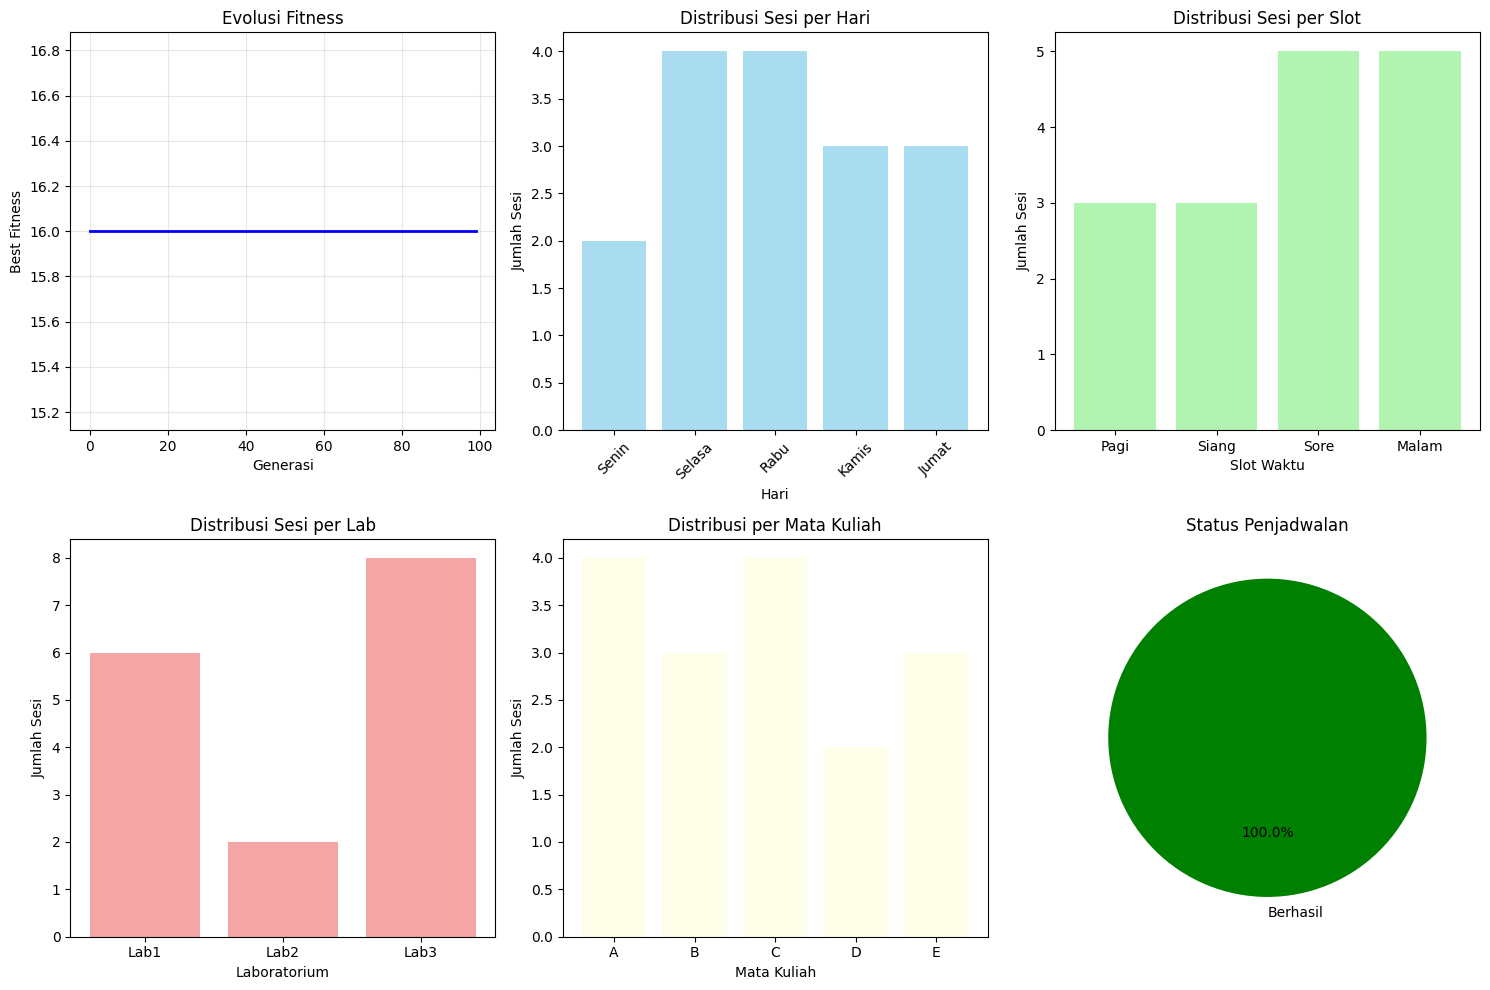

Visualisasi selesai!


In [71]:
# Cell 7: Visualisasi Grafik Evolusi
print("VISUALISASI EVOLUSI")
print("="*25)

plt.figure(figsize=(15, 10))

# Plot 1: Fitness Evolution
plt.subplot(2, 3, 1)
plt.plot(ga_scheduler.fitness_history, 'b-', linewidth=2)
plt.xlabel('Generasi')
plt.ylabel('Best Fitness')
plt.title('Evolusi Fitness')
plt.grid(True, alpha=0.3)

# Plot 2: Distribusi Sesi per Hari
plt.subplot(2, 3, 2)
hari_count = {h: 0 for h in hari}
for gen in best_schedule:
    hari_sesi = gen[2]
    hari_count[hari_sesi] += 1

plt.bar(hari_count.keys(), hari_count.values(), color='skyblue', alpha=0.7)
plt.xlabel('Hari')
plt.ylabel('Jumlah Sesi')
plt.title('Distribusi Sesi per Hari')
plt.xticks(rotation=45)

# Plot 3: Distribusi Sesi per Slot Waktu
plt.subplot(2, 3, 3)
slot_count = {slot: 0 for slot in slot_waktu}
for gen in best_schedule:
    slot_sesi = gen[3]
    slot_count[slot_sesi] += 1

plt.bar(slot_count.keys(), slot_count.values(), color='lightgreen', alpha=0.7)
plt.xlabel('Slot Waktu')
plt.ylabel('Jumlah Sesi')
plt.title('Distribusi Sesi per Slot')

# Plot 4: Distribusi Sesi per Lab
plt.subplot(2, 3, 4)
lab_count = {lab: 0 for lab in laboratorium}
for gen in best_schedule:
    lab_sesi = gen[4]
    lab_count[lab_sesi] += 1

plt.bar(lab_count.keys(), lab_count.values(), color='lightcoral', alpha=0.7)
plt.xlabel('Laboratorium')
plt.ylabel('Jumlah Sesi')
plt.title('Distribusi Sesi per Lab')

# Plot 5: Distribusi Mata Kuliah
plt.subplot(2, 3, 5)
matkul_count = {mk: 0 for mk in mata_kuliah}
for gen in best_schedule:
    mk = gen[0]
    matkul_count[mk] += 1

plt.bar([mk.split()[1] for mk in matkul_count.keys()], matkul_count.values(),
        color='lightyellow', alpha=0.7)
plt.xlabel('Mata Kuliah')
plt.ylabel('Jumlah Sesi')
plt.title('Distribusi per Mata Kuliah')

# Plot 6: Pie Chart Konflik
plt.subplot(2, 3, 6)
successful_sessions = best_fitness
failed_sessions = len(ga_scheduler.sesi_list) - best_fitness

if failed_sessions > 0:
    sizes = [successful_sessions, failed_sessions]
    labels = ['Berhasil', 'Konflik']
    colors = ['green', 'red']
else:
    sizes = [successful_sessions]
    labels = ['Berhasil']
    colors = ['green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Status Penjadwalan')

plt.tight_layout()
plt.show()

print("Visualisasi selesai!")

# **5. PSO**
Gunakan PSO untuk menemukan minimum dari fungsi matematis berikut:

dengan batasan −10≤ x,y ≤10

1.   Implementasikan PSO dengan 5 partikel.
2.   Jalankan selama 5 iterasi.
3.   Tampilkan koordinat titik minimum dan nilai fungsi minimumnya



In [72]:
# Cell 2: Definisi Fungsi yang Akan Dioptimasi
np.random.seed(42)
print("DEFINISI FUNGSI OBJEKTIF")
print("="*30)

def objective_function(x, y):
    """
    Fungsi objektif yang akan diminimasi
    f(x,y) = (x-3)² + (y+1)² + 5

    Minimum teoritis: x=3, y=-1, f_min=5
    """
    return (x - 3)**2 + (y + 1)**2 + 5

# Batasan domain
x_min, x_max = -10, 10
y_min, y_max = -10, 10

print("Fungsi objektif: f(x,y) = (x-3)² + (y+1)² + 5")
print(f"Domain: {x_min} ≤ x ≤ {x_max}, {y_min} ≤ y ≤ {y_max}")
print("Target: Mencari nilai minimum")

# Test fungsi pada beberapa titik
print(f"\nTest fungsi:")
test_points = [(0, 0), (3, -1), (-5, 5), (10, 10)]
for x, y in test_points:
    f_val = objective_function(x, y)
    print(f"f({x:2}, {y:2}) = {f_val:.2f}")

print(f"\nMinimum teoritis: f(3, -1) = {objective_function(3, -1)}")

DEFINISI FUNGSI OBJEKTIF
Fungsi objektif: f(x,y) = (x-3)² + (y+1)² + 5
Domain: -10 ≤ x ≤ 10, -10 ≤ y ≤ 10
Target: Mencari nilai minimum

Test fungsi:
f( 0,  0) = 15.00
f( 3, -1) = 5.00
f(-5,  5) = 105.00
f(10, 10) = 175.00

Minimum teoritis: f(3, -1) = 5


In [73]:
# Cell 3: Implementasi PSO Manual
print("IMPLEMENTASI PSO")
print("="*20)

class ParticleSwarmOptimizer:
    def __init__(self, num_particles=5, w=0.7, c1=1.5, c2=1.5):
        """
        PSO untuk minimisasi fungsi

        Parameters:
        num_particles: jumlah partikel
        w: inertia weight
        c1: cognitive coefficient
        c2: social coefficient
        """
        self.num_particles = num_particles
        self.w = w    # inertia weight
        self.c1 = c1  # cognitive coefficient
        self.c2 = c2  # social coefficient

        # Inisialisasi partikel
        self.positions = np.random.uniform([x_min, y_min], [x_max, y_max],
                                         (num_particles, 2))
        self.velocities = np.random.uniform(-1, 1, (num_particles, 2))

        # Personal best positions dan values
        self.pbest_positions = self.positions.copy()
        self.pbest_values = np.array([objective_function(pos[0], pos[1])
                                    for pos in self.positions])

        # Global best
        self.gbest_idx = np.argmin(self.pbest_values)
        self.gbest_position = self.pbest_positions[self.gbest_idx].copy()
        self.gbest_value = self.pbest_values[self.gbest_idx]

        # History untuk tracking
        self.history = []

        print(f"PSO diinisialisasi:")
        print(f"- Jumlah partikel: {num_particles}")
        print(f"- Inertia weight (w): {w}")
        print(f"- Cognitive coeff (c1): {c1}")
        print(f"- Social coeff (c2): {c2}")

    def evaluate_fitness(self):
        """Evaluasi fitness semua partikel"""
        fitness_values = []
        for i in range(self.num_particles):
            x, y = self.positions[i]
            fitness = objective_function(x, y)
            fitness_values.append(fitness)
        return np.array(fitness_values)

    def update_pbest(self, fitness_values):
        """Update personal best positions"""
        for i in range(self.num_particles):
            if fitness_values[i] < self.pbest_values[i]:
                self.pbest_values[i] = fitness_values[i]
                self.pbest_positions[i] = self.positions[i].copy()

    def update_gbest(self):
        """Update global best position"""
        best_idx = np.argmin(self.pbest_values)
        if self.pbest_values[best_idx] < self.gbest_value:
            self.gbest_value = self.pbest_values[best_idx]
            self.gbest_position = self.pbest_positions[best_idx].copy()
            self.gbest_idx = best_idx

    def update_velocities(self):
        """Update velocities menggunakan PSO formula"""
        for i in range(self.num_particles):
            # Random factors
            r1 = np.random.random(2)
            r2 = np.random.random(2)

            # PSO velocity update formula
            cognitive_component = self.c1 * r1 * (self.pbest_positions[i] - self.positions[i])
            social_component = self.c2 * r2 * (self.gbest_position - self.positions[i])

            self.velocities[i] = (self.w * self.velocities[i] +
                                cognitive_component + social_component)

    def update_positions(self):
        """Update positions berdasarkan velocities"""
        self.positions += self.velocities

        # Batasi positions dalam domain
        self.positions[:, 0] = np.clip(self.positions[:, 0], x_min, x_max)
        self.positions[:, 1] = np.clip(self.positions[:, 1], y_min, y_max)

    def optimize(self, max_iterations=5):
        """Proses optimisasi PSO"""
        print(f"\nMemulai optimisasi PSO untuk {max_iterations} iterasi...")

        # Evaluasi fitness awal
        fitness_values = self.evaluate_fitness()

        print(f"\nIterasi 0 (Inisialisasi):")
        self.print_iteration_info(0, fitness_values)

        # Simpan history
        self.history.append({
            'iteration': 0,
            'positions': self.positions.copy(),
            'fitness': fitness_values.copy(),
            'gbest_position': self.gbest_position.copy(),
            'gbest_value': self.gbest_value
        })

        # Iterasi PSO
        for iteration in range(1, max_iterations + 1):
            # Update velocities
            self.update_velocities()

            # Update positions
            self.update_positions()

            # Evaluasi fitness
            fitness_values = self.evaluate_fitness()

            # Update personal best
            self.update_pbest(fitness_values)

            # Update global best
            self.update_gbest()

            # Print info iterasi
            print(f"\nIterasi {iteration}:")
            self.print_iteration_info(iteration, fitness_values)

            # Simpan history
            self.history.append({
                'iteration': iteration,
                'positions': self.positions.copy(),
                'fitness': fitness_values.copy(),
                'gbest_position': self.gbest_position.copy(),
                'gbest_value': self.gbest_value
            })

        print(f"\nOptimisasi selesai!")
        return self.gbest_position, self.gbest_value

    def print_iteration_info(self, iteration, fitness_values):
        """Print informasi detail iterasi"""
        print(f"Posisi dan fitness partikel:")
        print("Partikel  x        y        f(x,y)")
        print("-" * 35)

        for i in range(self.num_particles):
            x, y = self.positions[i]
            fitness = fitness_values[i]
            marker = " *" if i == self.gbest_idx else "  "
            print(f"P{i+1}      {x:7.3f}  {y:7.3f}  {fitness:7.3f}{marker}")

        print(f"\nGlobal Best: x={self.gbest_position[0]:.3f}, y={self.gbest_position[1]:.3f}")
        print(f"Global Best Value: {self.gbest_value:.3f}")

# Inisialisasi PSO
pso = ParticleSwarmOptimizer(num_particles=5, w=0.7, c1=1.5, c2=1.5)

IMPLEMENTASI PSO
PSO diinisialisasi:
- Jumlah partikel: 5
- Inertia weight (w): 0.7
- Cognitive coeff (c1): 1.5
- Social coeff (c2): 1.5


In [74]:
# Cell 4: Menjalankan Optimisasi PSO
print("MENJALANKAN PSO")
print("="*20)

# Jalankan optimisasi
best_position, best_value = pso.optimize(max_iterations=5)

print(f"\nHASIL AKHIR PSO:")
print("="*25)
print(f"Koordinat minimum: x = {best_position[0]:.6f}, y = {best_position[1]:.6f}")
print(f"Nilai minimum: f(x,y) = {best_value:.6f}")

# Bandingkan dengan minimum teoritis
theoretical_min = objective_function(3, -1)
error_x = abs(best_position[0] - 3)
error_y = abs(best_position[1] - (-1))
error_f = abs(best_value - theoretical_min)

print(f"\nPerbandingan dengan minimum teoritis:")
print(f"Teoritis: x=3, y=-1, f=5")
print(f"Error x: {error_x:.6f}")
print(f"Error y: {error_y:.6f}")
print(f"Error f: {error_f:.6f}")

MENJALANKAN PSO

Memulai optimisasi PSO untuk 5 iterasi...

Iterasi 0 (Inisialisasi):
Posisi dan fitness partikel:
Partikel  x        y        f(x,y)
-----------------------------------
P1       -2.509    9.014  135.637  
P2        4.640    1.973   16.529 *
P3       -6.880   -6.880  137.183  
P4       -8.838    7.324  214.427  
P5        2.022    4.161   32.596  

Global Best: x=4.640, y=1.973
Global Best Value: 16.529

Iterasi 1:
Posisi dan fitness partikel:
Partikel  x        y        f(x,y)
-----------------------------------
P1       -0.048    5.803   60.565  
P2        5.105    1.570   16.039 *
P3        3.173   -5.059   21.504  
P4       10.000    0.870   57.498  
P5        4.614    2.424   19.330  

Global Best: x=5.105, y=1.570
Global Best Value: 16.039

Iterasi 2:
Posisi dan fitness partikel:
Partikel  x        y        f(x,y)
-----------------------------------
P1        1.941   -2.218    7.604 *
P2        5.431    1.289   16.148  
P3       10.000    3.924   78.245  
P4      

In [75]:
# Cell 5: Analisis Konvergensi PSO
print("ANALISIS KONVERGENSI")
print("="*25)

# Ekstrak data konvergensi
iterations = [h['iteration'] for h in pso.history]
gbest_values = [h['gbest_value'] for h in pso.history]
gbest_x = [h['gbest_position'][0] for h in pso.history]
gbest_y = [h['gbest_position'][1] for h in pso.history]

print("Evolusi Global Best:")
print("Iter  x_best    y_best    f_best")
print("-" * 32)

for i, (x, y, f) in enumerate(zip(gbest_x, gbest_y, gbest_values)):
    print(f"{i:2}    {x:7.3f}   {y:7.3f}   {f:7.3f}")

# Hitung improvement per iterasi
print(f"\nImprovement per iterasi:")
for i in range(1, len(gbest_values)):
    improvement = gbest_values[i-1] - gbest_values[i]
    print(f"Iterasi {i}: {improvement:.6f}")

# Hitung total improvement
total_improvement = gbest_values[0] - gbest_values[-1]
print(f"\nTotal improvement: {total_improvement:.6f}")
print(f"Improvement rate: {total_improvement/gbest_values[0]*100:.2f}%")

ANALISIS KONVERGENSI
Evolusi Global Best:
Iter  x_best    y_best    f_best
--------------------------------
 0      4.640     1.973    16.529
 1      5.105     1.570    16.039
 2      1.941    -2.218     7.604
 3      3.187    -0.693     5.129
 4      3.187    -0.693     5.129
 5      3.187    -0.693     5.129

Improvement per iterasi:
Iterasi 1: 0.489474
Iterasi 2: 8.435122
Iterasi 3: 2.475169
Iterasi 4: 0.000000
Iterasi 5: 0.000000

Total improvement: 11.399764
Improvement rate: 68.97%


VISUALISASI HASIL PSO


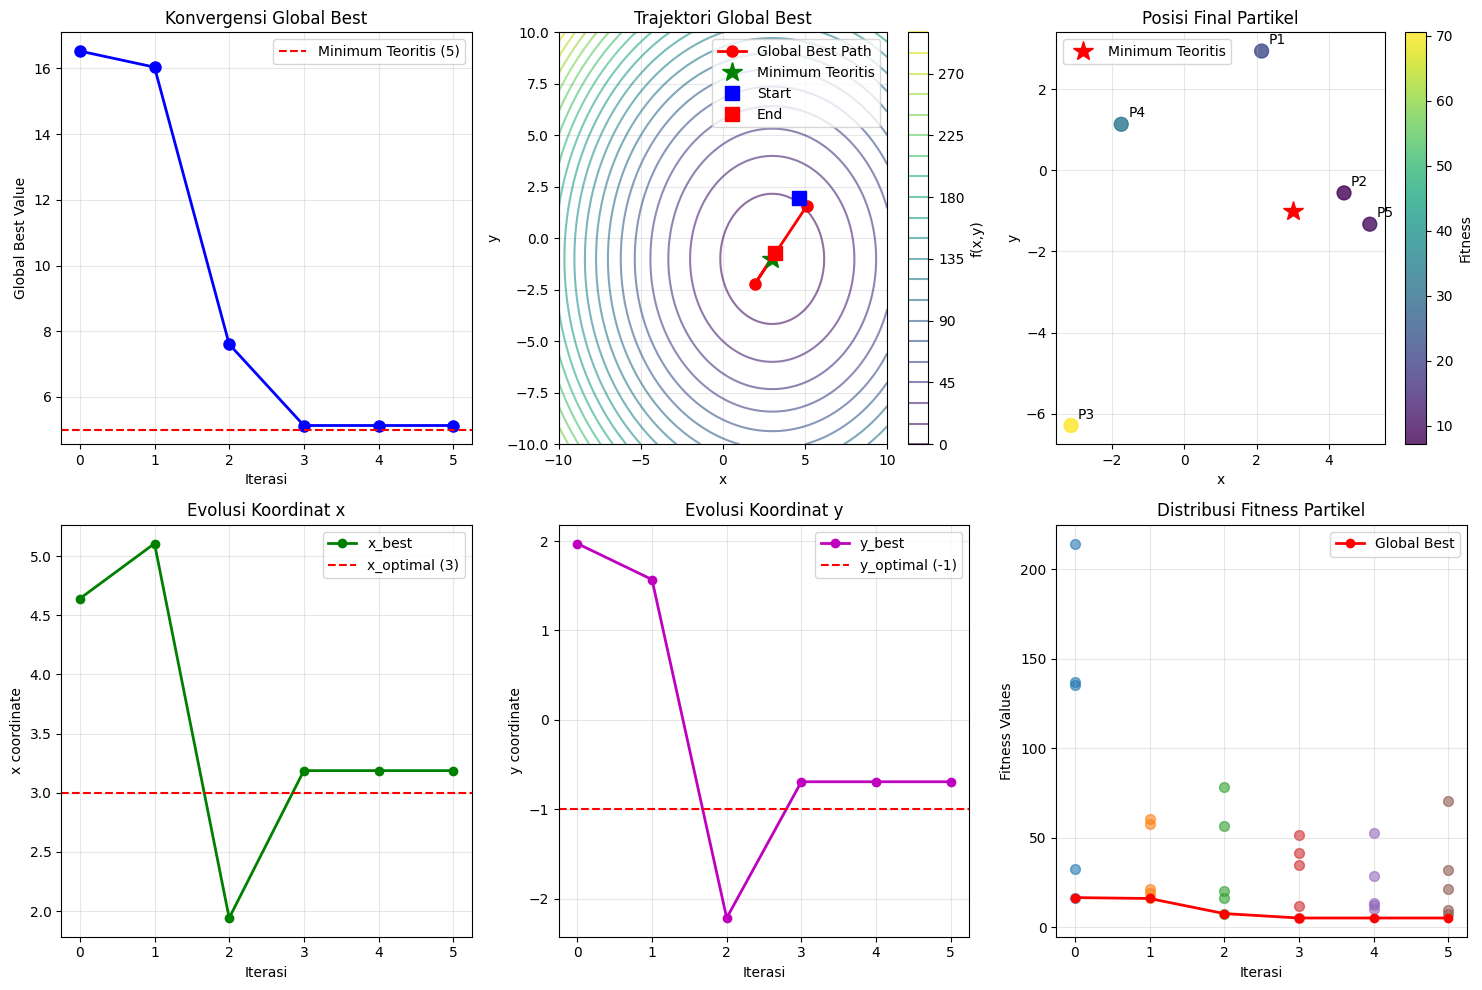

Visualisasi selesai!


In [76]:
# Cell 6: Visualisasi Trajektori dan Konvergensi
print("VISUALISASI HASIL PSO")
print("="*25)

plt.figure(figsize=(15, 10))

# Plot 1: Konvergensi Global Best
plt.subplot(2, 3, 1)
plt.plot(iterations, gbest_values, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=5, color='r', linestyle='--', label='Minimum Teoritis (5)')
plt.xlabel('Iterasi')
plt.ylabel('Global Best Value')
plt.title('Konvergensi Global Best')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Trajektori dalam ruang x-y
plt.subplot(2, 3, 2)

# Buat contour plot fungsi objektif
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = objective_function(X, Y)

plt.contour(X, Y, Z, levels=20, alpha=0.6)
plt.colorbar(label='f(x,y)')

# Plot trajektori global best
plt.plot(gbest_x, gbest_y, 'ro-', linewidth=2, markersize=8, label='Global Best Path')
plt.plot(3, -1, 'g*', markersize=15, label='Minimum Teoritis')
plt.plot(gbest_x[0], gbest_y[0], 'bs', markersize=10, label='Start')
plt.plot(gbest_x[-1], gbest_y[-1], 'rs', markersize=10, label='End')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajektori Global Best')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Posisi Final Semua Partikel
plt.subplot(2, 3, 3)
final_positions = pso.history[-1]['positions']
final_fitness = pso.history[-1]['fitness']

# Scatter plot partikel dengan color berdasarkan fitness
scatter = plt.scatter(final_positions[:, 0], final_positions[:, 1],
                     c=final_fitness, cmap='viridis', s=100, alpha=0.8)
plt.colorbar(scatter, label='Fitness')

# Annotate partikel
for i, (x, y) in enumerate(final_positions):
    plt.annotate(f'P{i+1}', (x, y), xytext=(5, 5), textcoords='offset points')

plt.plot(3, -1, 'r*', markersize=15, label='Minimum Teoritis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Posisi Final Partikel')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Evolusi Koordinat x
plt.subplot(2, 3, 4)
plt.plot(iterations, gbest_x, 'go-', linewidth=2, label='x_best')
plt.axhline(y=3, color='r', linestyle='--', label='x_optimal (3)')
plt.xlabel('Iterasi')
plt.ylabel('x coordinate')
plt.title('Evolusi Koordinat x')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Evolusi Koordinat y
plt.subplot(2, 3, 5)
plt.plot(iterations, gbest_y, 'mo-', linewidth=2, label='y_best')
plt.axhline(y=-1, color='r', linestyle='--', label='y_optimal (-1)')
plt.xlabel('Iterasi')
plt.ylabel('y coordinate')
plt.title('Evolusi Koordinat y')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Distribusi Fitness Partikel per Iterasi
plt.subplot(2, 3, 6)
for iteration in range(len(pso.history)):
    fitness_values = pso.history[iteration]['fitness']
    x_pos = [iteration] * len(fitness_values)
    plt.scatter(x_pos, fitness_values, alpha=0.6, s=50)

plt.plot(iterations, gbest_values, 'ro-', linewidth=2, label='Global Best')
plt.xlabel('Iterasi')
plt.ylabel('Fitness Values')
plt.title('Distribusi Fitness Partikel')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualisasi selesai!")

In [77]:
# Cell 7: Analisis Detail Pergerakan Partikel
print("ANALISIS DETAIL PERGERAKAN PARTIKEL")
print("="*40)

for p in range(pso.num_particles):
    print(f"\nPARTIKEL {p+1}:")
    print("Iter   x        y        f(x,y)   pbest_f")
    print("-" * 40)

    for h in pso.history:
        x, y = h['positions'][p]
        fitness = h['fitness'][p]

        # Cari pbest pada iterasi ini
        if h['iteration'] == 0:
            pbest_f = fitness
        else:
            # Ambil pbest dari iterasi sebelumnya atau update jika lebih baik
            prev_pbest = pso.pbest_values[p]
            pbest_f = min(prev_pbest, fitness)

        print(f"{h['iteration']:2}     {x:7.3f}  {y:7.3f}  {fitness:7.3f}  {pbest_f:7.3f}")

# Analisis diversity partikel
print(f"\nANALISIS DIVERSITY PARTIKEL:")
print("="*35)

for h in pso.history:
    positions = h['positions']

    # Hitung rata-rata posisi
    mean_x = np.mean(positions[:, 0])
    mean_y = np.mean(positions[:, 1])

    # Hitung diversity (standar deviasi dari mean)
    diversity_x = np.std(positions[:, 0])
    diversity_y = np.std(positions[:, 1])
    diversity_total = np.sqrt(diversity_x**2 + diversity_y**2)

    print(f"Iterasi {h['iteration']}: Diversity = {diversity_total:.3f}")

print(f"\nINTERPRETASI:")
print("- Diversity tinggi: partikel tersebar (eksplorasi)")
print("- Diversity rendah: partikel berkumpul (eksploitasi)")

ANALISIS DETAIL PERGERAKAN PARTIKEL

PARTIKEL 1:
Iter   x        y        f(x,y)   pbest_f
----------------------------------------
 0      -2.509    9.014  135.637  135.637
 1      -0.048    5.803   60.565    7.604
 2       1.941   -2.218    7.604    7.604
 3       3.334   -7.833   51.797    7.604
 4       2.433   -5.833   28.678    7.604
 5       2.135    2.939   21.263    7.604

PARTIKEL 2:
Iter   x        y        f(x,y)   pbest_f
----------------------------------------
 0       4.640    1.973   16.529   16.529
 1       5.105    1.570   16.039    7.185
 2       5.431    1.289   16.148    7.185
 3       4.784   -2.899   11.789    7.185
 4       2.583   -3.720   12.574    7.185
 5       4.410   -0.557    7.185    7.185

PARTIKEL 3:
Iter   x        y        f(x,y)   pbest_f
----------------------------------------
 0      -6.880   -6.880  137.183  137.183
 1       3.173   -5.059   21.504   21.504
 2      10.000    3.924   78.245   21.504
 3       6.795   -4.916   34.739   21.504
 4  

In [78]:
# Cell 9: Analisis Sensitivitas Parameter PSO
print("ANALISIS SENSITIVITAS PARAMETER")
print("="*35)

def test_pso_parameters(w_values, c1_values, c2_values, trials=3):
    """Test berbagai kombinasi parameter PSO"""
    results = []

    for w in w_values:
        for c1 in c1_values:
            for c2 in c2_values:
                trial_results = []

                for trial in range(trials):
                    # Set random seed berbeda untuk setiap trial
                    np.random.seed(42 + trial)

                    # Buat PSO dengan parameter tertentu
                    test_pso = ParticleSwarmOptimizer(num_particles=5, w=w, c1=c1, c2=c2)
                    best_pos, best_val = test_pso.optimize(max_iterations=5)
                    trial_results.append(best_val)

                avg_result = np.mean(trial_results)
                std_result = np.std(trial_results)

                results.append({
                    'w': w, 'c1': c1, 'c2': c2,
                    'avg_fitness': avg_result,
                    'std_fitness': std_result
                })

    return results

# Test parameter combinations
print("Testing parameter combinations...")
w_vals = [0.5, 0.7, 0.9]
c1_vals = [1.0, 1.5, 2.0]
c2_vals = [1.0, 1.5, 2.0]

# Test subset untuk demonstrasi (karena keterbatasan waktu)
quick_results = []
test_configs = [
    (0.7, 1.5, 1.5),  # Standard
    (0.5, 2.0, 2.0),  # High cognitive/social
    (0.9, 1.0, 1.0),  # High inertia
]

for w, c1, c2 in test_configs:
    np.random.seed(42)
    test_pso = ParticleSwarmOptimizer(num_particles=5, w=w, c1=c1, c2=c2)
    best_pos, best_val = test_pso.optimize(max_iterations=5)

    quick_results.append({
        'w': w, 'c1': c1, 'c2': c2,
        'best_fitness': best_val,
        'error': abs(best_val - 5)
    })

print("\nHasil Test Parameter:")
print("w     c1    c2    Best_Fitness  Error")
print("-" * 40)

for result in quick_results:
    print(f"{result['w']:<5} {result['c1']:<5} {result['c2']:<5} {result['best_fitness']:<12.3f} {result['error']:<8.6f}")

# Cari parameter terbaik
best_config = min(quick_results, key=lambda x: x['error'])
print(f"\nParameter terbaik: w={best_config['w']}, c1={best_config['c1']}, c2={best_config['c2']}")
print(f"Error: {best_config['error']:.6f}")

ANALISIS SENSITIVITAS PARAMETER
Testing parameter combinations...
PSO diinisialisasi:
- Jumlah partikel: 5
- Inertia weight (w): 0.7
- Cognitive coeff (c1): 1.5
- Social coeff (c2): 1.5

Memulai optimisasi PSO untuk 5 iterasi...

Iterasi 0 (Inisialisasi):
Posisi dan fitness partikel:
Partikel  x        y        f(x,y)
-----------------------------------
P1       -2.509    9.014  135.637  
P2        4.640    1.973   16.529 *
P3       -6.880   -6.880  137.183  
P4       -8.838    7.324  214.427  
P5        2.022    4.161   32.596  

Global Best: x=4.640, y=1.973
Global Best Value: 16.529

Iterasi 1:
Posisi dan fitness partikel:
Partikel  x        y        f(x,y)
-----------------------------------
P1       -0.048    5.803   60.565  
P2        5.105    1.570   16.039 *
P3        3.173   -5.059   21.504  
P4       10.000    0.870   57.498  
P5        4.614    2.424   19.330  

Global Best: x=5.105, y=1.570
Global Best Value: 16.039

Iterasi 2:
Posisi dan fitness partikel:
Partikel  x      

# **6. Ant Colony Optimization (ACO)**
Implementasikan ACO untuk menyelesaikan masalah Travelling Salesman Problem (TSP).
Diberikan 10 kota dengan jarak antar kota (dalam bentuk matriks).

*   Gunakan ACO untuk mencari rute terpendek
*   Implementasikan evaporasi dan pheromone update.
*   Visualisasikan rute terbaik dan total jaraknya (setelah 5 iterasi)

Seleksi dapat dilakukan menggunakan roulette wheel atau memilih berdasarkan
probabilitas tertinggi.

In [79]:
# Cell 2: Data 10 Kota dan Matriks Jarak

print("DATA 10 KOTA DAN MATRIKS JARAK")
print("="*35)

# Nama kota
cities = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
num_cities = len(cities)

# Matriks jarak antar kota (simetris)
distance_matrix = np.array([
    [0,  10, 15, 20, 25, 30, 35, 40, 45, 50],  # A
    [10, 0,  12, 18, 22, 28, 32, 38, 42, 48],  # B
    [15, 12, 0,  14, 16, 26, 30, 36, 40, 46],  # C
    [20, 18, 14, 0,  11, 24, 28, 34, 38, 44],  # D
    [25, 22, 16, 11, 0,  13, 26, 32, 36, 42],  # E
    [30, 28, 26, 24, 13, 0,  15, 19, 33, 39],  # F
    [35, 32, 30, 28, 26, 15, 0,  17, 21, 37],  # G
    [40, 38, 36, 34, 32, 19, 17, 0,  23, 29],  # H
    [45, 42, 40, 38, 36, 33, 21, 23, 0,  27],  # I
    [50, 48, 46, 44, 42, 39, 37, 29, 27, 0 ]   # J
])

print("Kota-kota:")
for i, city in enumerate(cities):
    print(f"{i}: {city}")

print(f"\nMatriks Jarak:")
print("    ", end="")
for city in cities:
    print(f"{city:4}", end="")
print()

for i, city in enumerate(cities):
    print(f"{city:2}: ", end="")
    for j in range(num_cities):
        print(f"{distance_matrix[i][j]:4}", end="")
    print()

print(f"\nJumlah kota: {num_cities}")
print("TSP: Mencari rute terpendek yang mengunjungi semua kota sekali")

DATA 10 KOTA DAN MATRIKS JARAK
Kota-kota:
0: A
1: B
2: C
3: D
4: E
5: F
6: G
7: H
8: I
9: J

Matriks Jarak:
    A   B   C   D   E   F   G   H   I   J   
A :    0  10  15  20  25  30  35  40  45  50
B :   10   0  12  18  22  28  32  38  42  48
C :   15  12   0  14  16  26  30  36  40  46
D :   20  18  14   0  11  24  28  34  38  44
E :   25  22  16  11   0  13  26  32  36  42
F :   30  28  26  24  13   0  15  19  33  39
G :   35  32  30  28  26  15   0  17  21  37
H :   40  38  36  34  32  19  17   0  23  29
I :   45  42  40  38  36  33  21  23   0  27
J :   50  48  46  44  42  39  37  29  27   0

Jumlah kota: 10
TSP: Mencari rute terpendek yang mengunjungi semua kota sekali


In [80]:
# Cell 3: Implementasi ACO Sederhana
print("IMPLEMENTASI ACO")
print("="*20)

class AntColonyOptimizer:
    def __init__(self, num_ants=10, alpha=1.0, beta=2.0, rho=0.5, Q=100):
        """
        ACO untuk TSP

        Parameters:
        num_ants: jumlah semut
        alpha: bobot pheromone
        beta: bobot heuristic (1/jarak)
        rho: tingkat evaporasi (0-1)
        Q: konstanta untuk update pheromone
        """
        self.num_ants = num_ants
        self.alpha = alpha  # pheromone importance
        self.beta = beta    # distance importance
        self.rho = rho      # evaporation rate
        self.Q = Q          # pheromone constant

        # Inisialisasi pheromone matrix
        self.pheromone = np.ones((num_cities, num_cities)) * 0.1

        # History untuk tracking
        self.best_route = None
        self.best_distance = float('inf')
        self.history = []

        print(f"ACO Parameters:")
        print(f"- Jumlah semut: {num_ants}")
        print(f"- Alpha (pheromone): {alpha}")
        print(f"- Beta (heuristic): {beta}")
        print(f"- Rho (evaporasi): {rho}")
        print(f"- Q (konstanta): {Q}")

    def calculate_distance(self, route):
        """Hitung total jarak rute"""
        total_distance = 0
        for i in range(len(route)):
            from_city = route[i]
            to_city = route[(i + 1) % len(route)]  # kembali ke kota awal
            total_distance += distance_matrix[from_city][to_city]
        return total_distance

    def calculate_probability(self, current_city, unvisited_cities):
        """Hitung probabilitas untuk memilih kota berikutnya"""
        probabilities = []

        for city in unvisited_cities:
            # Pheromone factor
            pheromone_factor = self.pheromone[current_city][city] ** self.alpha

            # Heuristic factor (1/distance)
            distance = distance_matrix[current_city][city]
            heuristic_factor = (1.0 / distance) ** self.beta

            # Combined probability
            prob = pheromone_factor * heuristic_factor
            probabilities.append(prob)

        # Normalize probabilities
        total_prob = sum(probabilities)
        if total_prob == 0:
            return [1.0/len(unvisited_cities)] * len(unvisited_cities)

        probabilities = [p / total_prob for p in probabilities]
        return probabilities

    def select_next_city(self, current_city, unvisited_cities):
        """Pilih kota berikutnya menggunakan roulette wheel"""
        probabilities = self.calculate_probability(current_city, unvisited_cities)

        # Roulette wheel selection
        rand = random.random()
        cumulative_prob = 0

        for i, prob in enumerate(probabilities):
            cumulative_prob += prob
            if rand <= cumulative_prob:
                return unvisited_cities[i]

        # Fallback jika ada masalah floating point
        return unvisited_cities[-1]

    def construct_route(self):
        """Konstruksi rute untuk satu semut"""
        # Mulai dari kota random
        start_city = random.randint(0, num_cities - 1)
        route = [start_city]
        unvisited = list(range(num_cities))
        unvisited.remove(start_city)

        current_city = start_city

        # Kunjungi semua kota
        while unvisited:
            next_city = self.select_next_city(current_city, unvisited)
            route.append(next_city)
            unvisited.remove(next_city)
            current_city = next_city

        return route

    def evaporate_pheromone(self):
        """Evaporasi pheromone"""
        self.pheromone *= (1 - self.rho)

    def update_pheromone(self, routes, distances):
        """Update pheromone berdasarkan rute semut"""
        for route, distance in zip(routes, distances):
            # Jumlah pheromone yang ditambahkan berbanding terbalik dengan jarak
            pheromone_amount = self.Q / distance

            # Update pheromone untuk setiap edge dalam rute
            for i in range(len(route)):
                from_city = route[i]
                to_city = route[(i + 1) % len(route)]

                self.pheromone[from_city][to_city] += pheromone_amount
                self.pheromone[to_city][from_city] += pheromone_amount  # symmetric

    def optimize(self, iterations=5):
        """Proses optimisasi ACO"""
        print(f"\nMemulai optimisasi ACO untuk {iterations} iterasi...")

        for iteration in range(iterations):
            print(f"\nIterasi {iteration + 1}:")

            # Konstruksi rute untuk semua semut
            routes = []
            distances = []

            for ant in range(self.num_ants):
                route = self.construct_route()
                distance = self.calculate_distance(route)

                routes.append(route)
                distances.append(distance)

                # Update best solution
                if distance < self.best_distance:
                    self.best_distance = distance
                    self.best_route = route.copy()

            # Evaporasi pheromone
            self.evaporate_pheromone()

            # Update pheromone
            self.update_pheromone(routes, distances)

            # Statistik iterasi
            avg_distance = np.mean(distances)
            min_distance = min(distances)

            print(f"  Best distance: {min_distance:.1f}")
            print(f"  Average distance: {avg_distance:.1f}")
            print(f"  Global best: {self.best_distance:.1f}")

            # Simpan history
            self.history.append({
                'iteration': iteration + 1,
                'best_distance': min_distance,
                'avg_distance': avg_distance,
                'global_best': self.best_distance,
                'routes': routes.copy(),
                'distances': distances.copy()
            })

        print(f"\nOptimisasi selesai!")
        return self.best_route, self.best_distance

# Inisialisasi ACO
aco = AntColonyOptimizer(num_ants=10, alpha=1.0, beta=2.0, rho=0.5, Q=100)

IMPLEMENTASI ACO
ACO Parameters:
- Jumlah semut: 10
- Alpha (pheromone): 1.0
- Beta (heuristic): 2.0
- Rho (evaporasi): 0.5
- Q (konstanta): 100


In [81]:
# Cell 4: Menjalankan Optimisasi ACO
print("MENJALANKAN ACO")
print("="*20)

# Jalankan optimisasi
best_route, best_distance = aco.optimize(iterations=5)

print(f"\nHASIL AKHIR ACO:")
print("="*25)

# Konversi route ke nama kota
route_cities = [cities[i] for i in best_route]
print(f"Rute terbaik: {' -> '.join(route_cities)} -> {route_cities[0]}")
print(f"Total jarak: {best_distance:.1f}")

# Tampilkan detail rute
print(f"\nDetail rute:")
print("Dari -> Ke    Jarak")
print("-" * 20)
total_check = 0
for i in range(len(best_route)):
    from_city = best_route[i]
    to_city = best_route[(i + 1) % len(best_route)]
    distance = distance_matrix[from_city][to_city]
    total_check += distance

    print(f"{cities[from_city]:2}   -> {cities[to_city]:2}    {distance:3}")

print(f"Total: {total_check:.1f}")

MENJALANKAN ACO

Memulai optimisasi ACO untuk 5 iterasi...

Iterasi 1:
  Best distance: 195.0
  Average distance: 246.5
  Global best: 195.0

Iterasi 2:
  Best distance: 202.0
  Average distance: 219.9
  Global best: 195.0

Iterasi 3:
  Best distance: 192.0
  Average distance: 205.4
  Global best: 192.0

Iterasi 4:
  Best distance: 192.0
  Average distance: 209.0
  Global best: 192.0

Iterasi 5:
  Best distance: 192.0
  Average distance: 208.2
  Global best: 192.0

Optimisasi selesai!

HASIL AKHIR ACO:
Rute terbaik: J -> I -> G -> F -> E -> D -> C -> B -> A -> H -> J
Total jarak: 192.0

Detail rute:
Dari -> Ke    Jarak
--------------------
J    -> I      27
I    -> G      21
G    -> F      15
F    -> E      13
E    -> D      11
D    -> C      14
C    -> B      12
B    -> A      10
A    -> H      40
H    -> J      29
Total: 192.0


In [82]:
# Cell 5: Analisis Konvergensi ACO
print("ANALISIS KONVERGENSI")
print("="*25)

# Ekstrak data konvergensi
iterations = [h['iteration'] for h in aco.history]
best_distances = [h['best_distance'] for h in aco.history]
avg_distances = [h['avg_distance'] for h in aco.history]
global_bests = [h['global_best'] for h in aco.history]

print("Evolusi solusi:")
print("Iter  Best_Iter  Avg_Iter   Global_Best")
print("-" * 38)

for i, (best, avg, global_best) in enumerate(zip(best_distances, avg_distances, global_bests)):
    print(f"{i+1:2}    {best:7.1f}    {avg:7.1f}    {global_best:9.1f}")

# Hitung improvement
print(f"\nImprovement analysis:")
initial_best = best_distances[0]
final_best = global_bests[-1]
improvement = initial_best - final_best
improvement_percent = (improvement / initial_best) * 100

print(f"Initial best: {initial_best:.1f}")
print(f"Final best: {final_best:.1f}")
print(f"Improvement: {improvement:.1f} ({improvement_percent:.1f}%)")

# Analisis diversity
print(f"\nDiversity analysis (per iterasi):")
for i, h in enumerate(aco.history):
    distances = h['distances']
    diversity = np.std(distances)
    print(f"Iterasi {i+1}: std = {diversity:.1f}")

ANALISIS KONVERGENSI
Evolusi solusi:
Iter  Best_Iter  Avg_Iter   Global_Best
--------------------------------------
 1      195.0      246.5        195.0
 2      202.0      219.9        195.0
 3      192.0      205.4        192.0
 4      192.0      209.0        192.0
 5      192.0      208.2        192.0

Improvement analysis:
Initial best: 195.0
Final best: 192.0
Improvement: 3.0 (1.5%)

Diversity analysis (per iterasi):
Iterasi 1: std = 29.9
Iterasi 2: std = 10.5
Iterasi 3: std = 12.2
Iterasi 4: std = 14.5
Iterasi 5: std = 18.1


VISUALISASI HASIL ACO


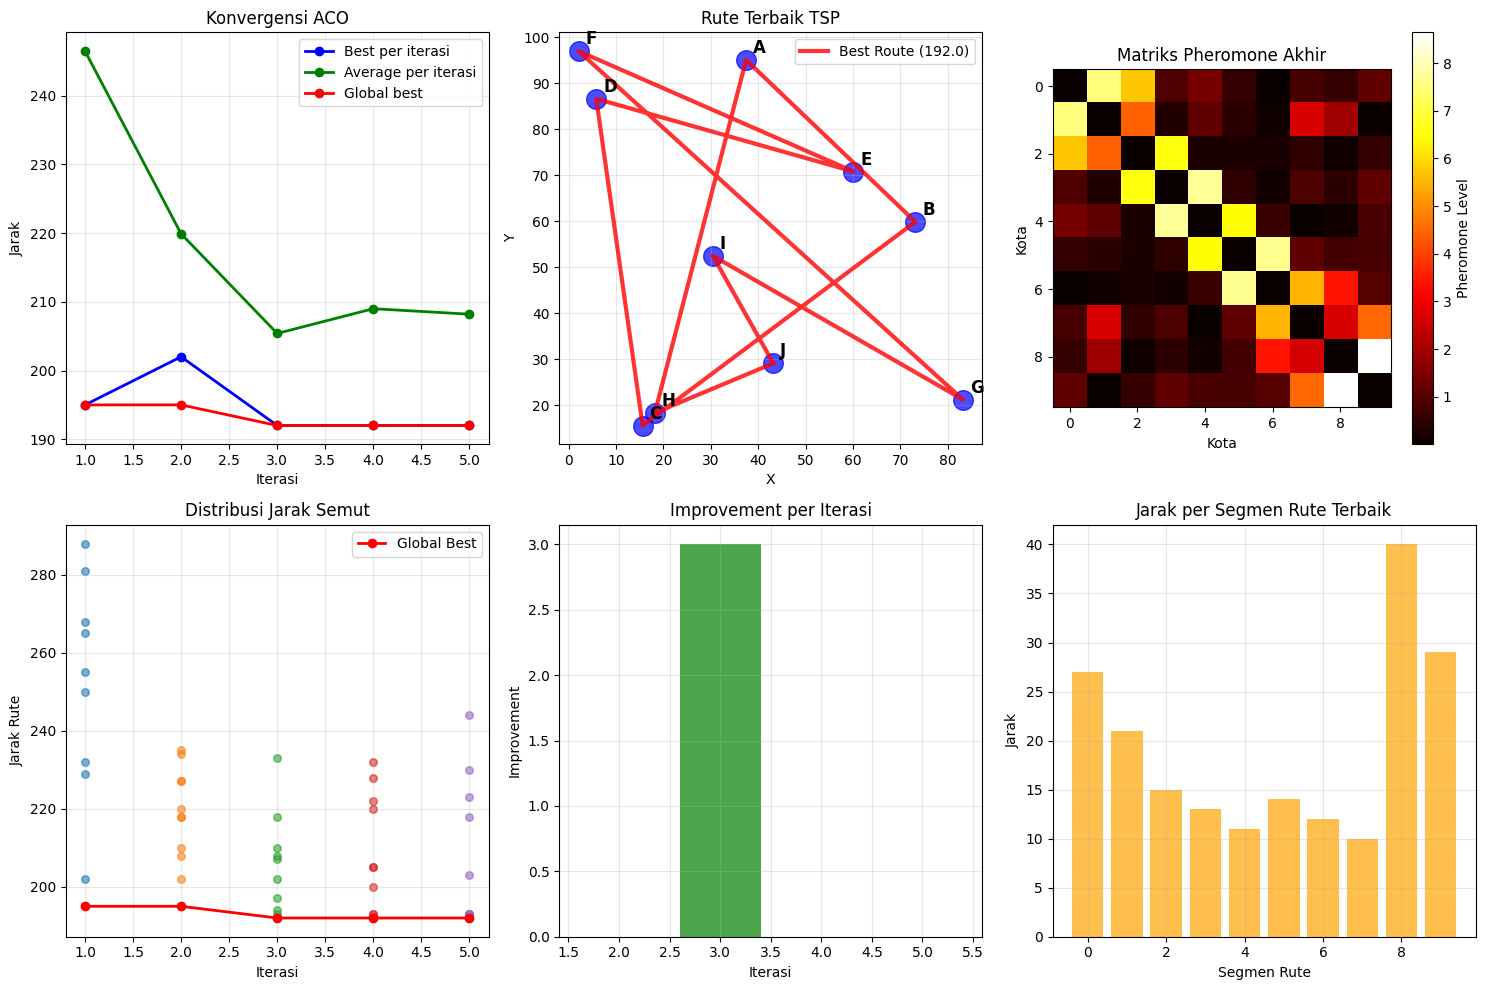

Visualisasi selesai!


In [83]:
# Cell 6: Visualisasi Hasil ACO
print("VISUALISASI HASIL ACO")
print("="*25)

plt.figure(figsize=(15, 10))

# Plot 1: Konvergensi
plt.subplot(2, 3, 1)
plt.plot(iterations, best_distances, 'bo-', label='Best per iterasi', linewidth=2)
plt.plot(iterations, avg_distances, 'go-', label='Average per iterasi', linewidth=2)
plt.plot(iterations, global_bests, 'ro-', label='Global best', linewidth=2)
plt.xlabel('Iterasi')
plt.ylabel('Jarak')
plt.title('Konvergensi ACO')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Koordinat kota (generate random untuk visualisasi)
np.random.seed(42)
city_coords = {}
for i, city in enumerate(cities):
    x = np.random.uniform(0, 100)
    y = np.random.uniform(0, 100)
    city_coords[i] = (x, y)

plt.subplot(2, 3, 2)
# Plot semua kota
for i, city in enumerate(cities):
    x, y = city_coords[i]
    plt.scatter(x, y, s=200, c='blue', alpha=0.7)
    plt.annotate(city, (x, y), xytext=(5, 5), textcoords='offset points',
                fontsize=12, fontweight='bold')

# Plot rute terbaik
route_x = []
route_y = []
for city_idx in best_route:
    x, y = city_coords[city_idx]
    route_x.append(x)
    route_y.append(y)

# Tambah kembali ke kota awal
route_x.append(city_coords[best_route[0]][0])
route_y.append(city_coords[best_route[0]][1])

plt.plot(route_x, route_y, 'r-', linewidth=3, alpha=0.8, label=f'Best Route ({best_distance:.1f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rute Terbaik TSP')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Matriks Pheromone
plt.subplot(2, 3, 3)
plt.imshow(aco.pheromone, cmap='hot', interpolation='nearest')
plt.colorbar(label='Pheromone Level')
plt.title('Matriks Pheromone Akhir')
plt.xlabel('Kota')
plt.ylabel('Kota')

# Plot 4: Distribusi jarak per iterasi
plt.subplot(2, 3, 4)
for i, h in enumerate(aco.history):
    distances = h['distances']
    x_pos = [i + 1] * len(distances)
    plt.scatter(x_pos, distances, alpha=0.6, s=30)

plt.plot(iterations, global_bests, 'ro-', linewidth=2, label='Global Best')
plt.xlabel('Iterasi')
plt.ylabel('Jarak Rute')
plt.title('Distribusi Jarak Semut')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Improvement per iterasi
plt.subplot(2, 3, 5)
improvements = []
for i in range(1, len(global_bests)):
    imp = global_bests[i-1] - global_bests[i]
    improvements.append(imp)

if improvements:
    plt.bar(range(2, len(global_bests) + 1), improvements, alpha=0.7, color='green')
    plt.xlabel('Iterasi')
    plt.ylabel('Improvement')
    plt.title('Improvement per Iterasi')
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'No improvement\nafter first iteration',
             ha='center', va='center', transform=plt.gca().transAxes)

# Plot 6: Heatmap jarak dalam rute terbaik
plt.subplot(2, 3, 6)
route_distances = []
for i in range(len(best_route)):
    from_city = best_route[i]
    to_city = best_route[(i + 1) % len(best_route)]
    route_distances.append(distance_matrix[from_city][to_city])

plt.bar(range(len(route_distances)), route_distances, alpha=0.7, color='orange')
plt.xlabel('Segmen Rute')
plt.ylabel('Jarak')
plt.title('Jarak per Segmen Rute Terbaik')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualisasi selesai!")

In [85]:
# Cell 7: Analisis Detail Pheromone
print("ANALISIS PHEROMONE")
print("="*25)

print("Pheromone matrix akhir:")
print("      ", end="")
for city in cities:
    print(f"{city:8}", end="")
print()

for i, city in enumerate(cities):
    print(f"{city:4}: ", end="")
    for j in range(num_cities):
        print(f"{aco.pheromone[i][j]:8.3f}", end="")
    print()

# Analisis edge dengan pheromone tertinggi
print(f"\nEdge dengan pheromone tertinggi:")
edge_pheromones = []
for i in range(num_cities):
    for j in range(i+1, num_cities):
        pheromone_level = aco.pheromone[i][j]
        edge_pheromones.append((cities[i], cities[j], pheromone_level))

# Sort berdasarkan pheromone level
edge_pheromones.sort(key=lambda x: x[2], reverse=True)

print("Edge         Pheromone")
print("-" * 20)
for i in range(min(10, len(edge_pheromones))):
    city1, city2, pheromone = edge_pheromones[i]
    print(f"{city1}-{city2:8} {pheromone:8.3f}")

# Bandingkan dengan rute terbaik
print(f"\nPheromone pada rute terbaik:")
route_pheromones = []
for i in range(len(best_route)):
    from_city = best_route[i]
    to_city = best_route[(i + 1) % len(best_route)]
    pheromone_level = aco.pheromone[from_city][to_city]
    route_pheromones.append((cities[from_city], cities[to_city], pheromone_level))

print("Edge         Pheromone")
print("-" * 20)
for city1, city2, pheromone in route_pheromones:
    print(f"{city1}-{city2:8} {pheromone:8.3f}")

avg_route_pheromone = np.mean([p[2] for p in route_pheromones])
print(f"\nRata-rata pheromone rute terbaik: {avg_route_pheromone:.3f}")

ANALISIS PHEROMONE
Pheromone matrix akhir:
      A       B       C       D       E       F       G       H       I       J       
A   :    0.003   7.525   5.716   0.902   1.407   0.572   0.003   0.788   0.552   1.142
B   :    7.525   0.003   4.423   0.333   1.122   0.447   0.083   2.703   1.946   0.025
C   :    5.716   4.423   0.003   6.566   0.265   0.258   0.222   0.497   0.095   0.565
D   :    0.902   0.333   6.566   0.003   7.747   0.502   0.109   0.870   0.456   1.123
E   :    1.407   1.122   0.265   7.747   0.003   6.480   0.621   0.003   0.136   0.827
F   :    0.572   0.447   0.258   0.502   6.480   0.003   7.699   1.111   0.754   0.784
G   :    0.003   0.083   0.222   0.109   0.621   7.699   0.003   5.492   3.380   0.998
H   :    0.788   2.703   0.497   0.870   0.003   1.111   5.492   0.003   2.645   4.499
I   :    0.552   1.946   0.095   0.456   0.136   0.754   3.380   2.645   0.003   8.644
J   :    1.142   0.025   0.565   1.123   0.827   0.784   0.998   4.499   8.644   0.003
